In [1]:
import os, sys
import healpy as hp
import numpy as np

sys.path.append('../../')
sys.path.append('/DMASS-analysis/measurements/code_py3/')

import esutil
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from utils import *

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

os.chdir('../../DMASS-analysis/measurements/code_py3/')
#print(os.getcwd())

from calling_catalogs import *

rootdir = '/users/PCON0003/warner785/DMASS-analysis/measurements/clustering/'

from ggl_mcal import run_ng_jk, run_nn_jk, run_nk_jk, compute_eix_jk, compute_Rgamma_jk, construct_jk, compute_jkcov, save_results

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
def calling_lens_catalog_cut(catname=None):

    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
    os.system('mkdir '+catdir)
    dmass = esutil.io.read(catname)
    w_dmass = dmass['CMASS_PROB']
    print ('Calculating DMASS systematic weights...')
    dmass = appendColumn(dmass, name='WEIGHT', value= w_dmass )
#   dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]   # for low probability galaxies
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')
    
    randoms = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/random_dmass_y1_public_v1.fits')
#    randoms = esutil.io.read('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_st82_DET200_randoms.fits')
    
#    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
#    os.system('mkdir '+catdir)
#    dmass = esutil.io.read('/n/des/lee.5922/data/dmass_cat/dmass_spt_sys_v3.fits')
    w_dmass = dmass['CMASS_PROB'] *dmass['SYS_WEIGHT']
    print ('Calculatig DMASS systematic weights...')
    dmass['WEIGHT'] = w_dmass
    dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]
    
    # find cutoff later
#    dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

#    randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

    print ('Resulting catalog size')
    print ('DMASS=', np.sum(dmass['WEIGHT']) )
    print ('randoms=', randoms.size)
    return dmass, randoms

In [2]:
def calling_lens_catalog(catname=None):

    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
    os.system('mkdir '+catdir)
    dmass = esutil.io.read(catname)
    w_dmass = dmass['CMASS_PROB']
    print ('Calculating DMASS systematic weights...')
    dmass = appendColumn(dmass, name='WEIGHT', value= w_dmass )
#   dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]   # for low probability galaxies
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')
    
    randoms = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/random_dmass_y1_public_v1.fits')
#    randoms = esutil.io.read('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_st82_DET200_randoms.fits')
    
#    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
#    os.system('mkdir '+catdir)
#    dmass = esutil.io.read('/n/des/lee.5922/data/dmass_cat/dmass_spt_sys_v3.fits')
    w_dmass = dmass['CMASS_PROB'] *dmass['SYS_WEIGHT']
    print ('Calculatig DMASS systematic weights...')
    dmass['WEIGHT'] = w_dmass
    
    # find cutoff later
#    dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

#    randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

    print ('Resulting catalog size')
    print ('DMASS=', np.sum(dmass['WEIGHT']) )
    print ('randoms=', randoms.size)
    return dmass, randoms

In [31]:
def calling_lens_catalog_unweighted(catname=None):

    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
    os.system('mkdir '+catdir)
    dmass = esutil.io.read(catname)
    w_dmass = dmass['CMASS_PROB']
    print ('Calculating DMASS systematic weights...')
    dmass = appendColumn(dmass, name='WEIGHT', value= w_dmass )
#   dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]   # for low probability galaxies
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')
    
    randoms = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/random_dmass_y1_public_v1.fits')
#    randoms = esutil.io.read('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_st82_DET200_randoms.fits')
    
#    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
#    os.system('mkdir '+catdir)
#    dmass = esutil.io.read('/n/des/lee.5922/data/dmass_cat/dmass_spt_sys_v3.fits')
    w_dmass = dmass['CMASS_PROB']
    dmass['WEIGHT'] = w_dmass
    
    # find cutoff later
#    dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

#    randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

    print ('Resulting catalog size')
    print ('DMASS=', np.sum(dmass['WEIGHT']) )
    print ('randoms=', randoms.size)
    return dmass, randoms

In [ ]:
dmass_val, randoms = calling_lens_catalog('../../../DMASSY3/output/test/train_cat/y3/dmass_sys_weight_val_FULL_lin.fits')
print(dmass_val.dtype.names)

In [6]:
dmass_lin, randoms = calling_lens_catalog('/fs/scratch/PCON0008/warner785/bwarner/dmass_sys_weight_pca.fits')
print(dmass_lin.dtype.names)

Calculating DMASS systematic weights...
Calculatig DMASS systematic weights...
Resulting catalog size
DMASS= 28606.30039524579
randoms= 5864645
('COADD_OBJECT_ID', 'RA', 'DEC', 'HPIX_4096', 'MAG_DETMODEL_G', 'MAGERR_DETMODEL_G', 'MAG_DETMODEL_R', 'MAGERR_DETMODEL_R', 'MAG_DETMODEL_I', 'MAGERR_DETMODEL_I', 'MAG_DETMODEL_Z', 'MAGERR_DETMODEL_Z', 'MOF_CM_MAG_ERR_G', 'MOF_CM_MAG_ERR_R', 'MOF_CM_MAG_ERR_I', 'MOF_CM_MAG_ERR_Z', 'MOF_CM_MAG_CORRECTED_G', 'MOF_CM_MAG_CORRECTED_R', 'MOF_CM_MAG_CORRECTED_I', 'MOF_CM_MAG_CORRECTED_Z', 'SOF_CM_MAG_ERR_G', 'SOF_CM_MAG_ERR_R', 'SOF_CM_MAG_ERR_I', 'SOF_CM_MAG_ERR_Z', 'SOF_CM_MAG_CORRECTED_G', 'SOF_CM_MAG_CORRECTED_R', 'SOF_CM_MAG_CORRECTED_I', 'SOF_CM_MAG_CORRECTED_Z', 'EXTENDED_CLASS_MASH_SOF', 'CMASS_PROB', 'WEIGHT', 'SYS_WEIGHT')


In [34]:
dmass_unweight, randoms = calling_lens_catalog_unweighted('../../../DMASSY3/output/test/train_cat/y3/dmass_sys_weight_comp_FULL_lin.fits')

Calculating DMASS systematic weights...
Resulting catalog size
DMASS= 28744.940885503773
randoms= 5864645


In [7]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

In [8]:
def ra_dec_to_xyz(ra, dec):
    """Convert ra & dec to Euclidean points
    Parameters
    ----------
    ra, dec : ndarrays
    Returns
    x, y, z : ndarrays
    """
    sin_ra = np.sin(ra * np.pi / 180.)
    cos_ra = np.cos(ra * np.pi / 180.)

    sin_dec = np.sin(np.pi / 2 - dec * np.pi / 180.)
    cos_dec = np.cos(np.pi / 2 - dec * np.pi / 180.)

    return (cos_ra * sin_dec,
            sin_ra * sin_dec,
            cos_dec)

def uniform_sphere(RAlim, DEClim, size=1):
    """Draw a uniform sample on a sphere
    Parameters
    ----------
    RAlim : tuple
        select Right Ascension between RAlim[0] and RAlim[1]
        units are degrees
    DEClim : tuple
        select Declination between DEClim[0] and DEClim[1]
    size : int (optional)
        the size of the random arrays to return (default = 1)
    Returns
    -------
    RA, DEC : ndarray
        the random sample on the sphere within the given limits.
        arrays have shape equal to size.
    """
    zlim = np.sin(np.pi * np.asarray(DEClim) / 180.)

    z = zlim[0] + (zlim[1] - zlim[0]) * np.random.random(size)
    DEC = (180. / np.pi) * np.arcsin(z)
    RA = RAlim[0] + (RAlim[1] - RAlim[0]) * np.random.random(size)
    
    return RA, DEC

def uniform_random_on_sphere(data, size = None ):
    ra = data['RA']
    dec = data['DEC']
    
    n_features = ra.size
    #size = 100 * data.size
    
    # draw a random sample with N points
    ra_R, dec_R = uniform_sphere((min(ra), max(ra)),
                                 (min(dec), max(dec)),
                                 size)
    #data = np.asarray(ra_dec_to_xyz(ra, dec), order='F').T
    #data_R = np.asarray(ra_dec_to_xyz(ra_R, dec_R), order='F').T
    
    #random redshift distribution
    
    data_R = np.zeros((ra_R.size,), dtype=[('RA', 'float'), ('DEC', 'float')])
    data_R['RA'] = ra_R
    data_R['DEC'] = dec_R
                              
    return data_R

## ---------------------------------------------
## generate randoms in a dmass region
# applying LSS mask 


#random_create = uniform_random_on_sphere(dmass_val, size = 50 * dmass_val.size)
#random_create = keepGoodRegion(random_create)

random_lin = uniform_random_on_sphere(dmass_lin, size = 50 * dmass_lin.size)
random_lin = keepGoodRegion(random_lin)

#mask = (gold_st82['RA']>310) & (gold_st82['RA']<360)|(gold_st82['RA']<7)
#mask = mask & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
#gold_st82_train = gold_st82[mask]

In [37]:
random_unw = uniform_random_on_sphere(dmass_unweight, size = 50 * dmass_unweight.size)
random_unw = keepGoodRegion(random_unw)

In [9]:
#randomsind_create = np.random.choice( random_create.size, size=int(random_create.size/3.) )
#random_create = random_create[randomsind_create]

randomsind_lin = np.random.choice( random_lin.size, size=int(random_lin.size/3.) )
random_lin = random_lin[randomsind_lin]

In [39]:
randomsind_unw = np.random.choice( random_unw.size, size=int(random_unw.size/3.) )
random_unw = random_unw[randomsind_unw]

In [10]:
def treecorr_xi(lens, random=None, filename=None, rootdir=None, 
		nbins=20, min_sep=2.5, max_sep=250, sep_units='arcmin', bin_slop=0.05, 
        npatch=10, var_method='jackknife', cen_file = None):
    
    import treecorr
    
#        .. note::
#        The default method for estimating the variance and covariance attributes (``varxip``,
#        ``varxim``, and ``cov``) is 'shot', which only includes the shape noise propagated into
#        the final correlation.  This does not include sample variance, so it is always an
#        underestimate of the actual variance.  To get better estimates, you need to set
#        ``var_method`` to something else and use patches in the input catalog(s).
#        cf. `Covariance Estimates`.

    if cen_file != None:
        if os.path.exists(cen_file):
            print ('Saved cen_file exists:',cen_file)
            cen_file_switch_on = cen_file
            npatch=1
        else : 
            print ('Create cen_file=',cen_file)
            cen_file_switch_on = None

    #temp_dir=filename.split('.txt')[0]
    cat_l = treecorr.Catalog(ra=lens['RA'], dec=lens['DEC'], w=lens['WEIGHT'], 
                             ra_units='deg', dec_units='deg', npatch=npatch, 
                             patch_centers=cen_file_switch_on )

    if cen_file_switch_on == None : 
        cat_l.write_patch_centers(cen_file)
#changed to make weights = 1 for randoms
    from numpy.lib.recfunctions import append_fields
    weights = np.zeros(len(random))
    for x in range(len(random)-1):
        weights[x]=1
    random = append_fields(random, 'WEIGHT', weights, usemask=False)
    
    cat_r = treecorr.Catalog(ra=random['RA'], dec=random['DEC'], w=random['WEIGHT'], 
                             ra_units='deg', dec_units='deg', 
                             patch_centers=cen_file_switch_on )
    
    dd = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                            max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                            var_method=var_method,
                            num_threads=30, verbose=1)
    dr = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)
    rd = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)
    rr = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)

    dd.process(cat_l)
    dr.process(cat_l, cat_r)
    rd.process(cat_r, cat_l)
    rr.process(cat_r)
    xi,varxi = dd.calculateXi(rr,dr)
    dd.write(filename,rr,dr,rd, write_patch_results=True)
    #write(file_name, *, rr=None, dr=None, rd=None, file_type=None, precision=None, write_patch_results=False)
    
    cov_jk = dd.estimate_cov(var_method)
    cov_filename=filename.split('.txt')[0]+'.cov'
    np.savetxt(cov_filename, cov_jk)
    #np.save
    print ('save to', filename)
    
# search for VETO in run_DMASS
# ask Su about this, if not

In [41]:
npatch=80
tempdir = rootdir+'/{}/'.format(npatch)
cen_file = tempdir + 'nn_cen_file.txt'
filename = tempdir + 'nn.lens.txt'

#os.system('mkdir '+savedir)
#print (os.path.exists(tempdir) )
os.system('rm -rf '+tempdir)
os.system('mkdir '+tempdir)

# default of poisson errors -- try this
# ***save to different variables to compare different methods of errors

treecorr_xi(dmass_val, random=random_create,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.05,
        npatch=npatch, cen_file=cen_file, var_method='shot')

cov_new_dmass= np.genfromtxt(tempdir+'/nn.lens.cov'.format(npatch))
_, meanr, _, galaxy_xi, xi_err,_,_,_,_,_ = np.genfromtxt(tempdir+'nn.lens.txt'.format(npatch), unpack=True)

Create cen_file= /users/PCON0003/warner785/DMASS-analysis/measurements/clustering//80/nn_cen_file.txt
save to /users/PCON0003/warner785/DMASS-analysis/measurements/clustering//80/nn.lens.txt


In [13]:
# downsampling DMASS

dmass_sample = dmass_lin[:500]
random_sample = random_lin[:500]

In [16]:
#Other dmass-- Prob Cut

npatch=16
tempdir = rootdir+'/{}/'.format(npatch)
cen_file = tempdir + 'nn_cen_file_lin.txt'
filename = tempdir + 'nn.lens_lin.txt'

#os.system('mkdir '+savedir)
#print (os.path.exists(tempdir) )
os.system('rm -rf '+tempdir)
os.system('mkdir '+tempdir)

# default of poisson errors -- try this
# ***save to different variables to compare different methods of errors

treecorr_xi(dmass_sample, random=random_sample,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.05,
        npatch=npatch, cen_file=cen_file, var_method='jackknife')


#np.std( xi ) = err_xi
#np.mean(xi) = mean of jackknife correlation function in each bin
# one correlation function per bin

# compare with treecorr method

cov_new_dmass_lin= np.genfromtxt(tempdir+'/nn.lens_lin.cov'.format(npatch))

# text loading --- new way to load multiple: FIX
_, meanr_lin, _, galaxy_xi_lin, xi_err_lin,_,_,_,_,_ = np.genfromtxt(tempdir+'nn.lens_lin.txt'.format(npatch), unpack=True)

#meanr_lin, galaxy_xi_lin, xi_err_lin,_,_2 = np.genfromtxt(tempdir+'nn.lens_lin.txt'.format(npatch), unpack=True)

Create cen_file= /users/PCON0003/warner785/DMASS-analysis/measurements/clustering//16/nn_cen_file_lin.txt
save to /users/PCON0003/warner785/DMASS-analysis/measurements/clustering//16/nn.lens_lin.txt


ValueError: Some errors were detected !
    Line #24 (got 5 columns instead of 10)
    Line #25 (got 5 columns instead of 10)
    Line #26 (got 5 columns instead of 10)
    Line #27 (got 5 columns instead of 10)
    Line #28 (got 5 columns instead of 10)
    Line #29 (got 5 columns instead of 10)
    Line #30 (got 5 columns instead of 10)
    Line #31 (got 5 columns instead of 10)
    Line #32 (got 5 columns instead of 10)
    Line #33 (got 5 columns instead of 10)
    Line #34 (got 5 columns instead of 10)
    Line #35 (got 5 columns instead of 10)
    Line #36 (got 5 columns instead of 10)
    Line #37 (got 5 columns instead of 10)
    Line #38 (got 5 columns instead of 10)
    Line #39 (got 5 columns instead of 10)
    Line #40 (got 5 columns instead of 10)
    Line #41 (got 5 columns instead of 10)
    Line #42 (got 5 columns instead of 10)
    Line #43 (got 5 columns instead of 10)
    Line #47 (got 5 columns instead of 10)
    Line #48 (got 5 columns instead of 10)
    Line #49 (got 5 columns instead of 10)
    Line #50 (got 5 columns instead of 10)
    Line #51 (got 5 columns instead of 10)
    Line #52 (got 5 columns instead of 10)
    Line #53 (got 5 columns instead of 10)
    Line #54 (got 5 columns instead of 10)
    Line #55 (got 5 columns instead of 10)
    Line #56 (got 5 columns instead of 10)
    Line #57 (got 5 columns instead of 10)
    Line #58 (got 5 columns instead of 10)
    Line #59 (got 5 columns instead of 10)
    Line #60 (got 5 columns instead of 10)
    Line #61 (got 5 columns instead of 10)
    Line #62 (got 5 columns instead of 10)
    Line #63 (got 5 columns instead of 10)
    Line #64 (got 5 columns instead of 10)
    Line #65 (got 5 columns instead of 10)
    Line #66 (got 5 columns instead of 10)
    Line #70 (got 5 columns instead of 10)
    Line #71 (got 5 columns instead of 10)
    Line #72 (got 5 columns instead of 10)
    Line #73 (got 5 columns instead of 10)
    Line #74 (got 5 columns instead of 10)
    Line #75 (got 5 columns instead of 10)
    Line #76 (got 5 columns instead of 10)
    Line #77 (got 5 columns instead of 10)
    Line #78 (got 5 columns instead of 10)
    Line #79 (got 5 columns instead of 10)
    Line #80 (got 5 columns instead of 10)
    Line #81 (got 5 columns instead of 10)
    Line #82 (got 5 columns instead of 10)
    Line #83 (got 5 columns instead of 10)
    Line #84 (got 5 columns instead of 10)
    Line #85 (got 5 columns instead of 10)
    Line #86 (got 5 columns instead of 10)
    Line #87 (got 5 columns instead of 10)
    Line #88 (got 5 columns instead of 10)
    Line #89 (got 5 columns instead of 10)
    Line #93 (got 5 columns instead of 10)
    Line #94 (got 5 columns instead of 10)
    Line #95 (got 5 columns instead of 10)
    Line #96 (got 5 columns instead of 10)
    Line #97 (got 5 columns instead of 10)
    Line #98 (got 5 columns instead of 10)
    Line #99 (got 5 columns instead of 10)
    Line #100 (got 5 columns instead of 10)
    Line #101 (got 5 columns instead of 10)
    Line #102 (got 5 columns instead of 10)
    Line #103 (got 5 columns instead of 10)
    Line #104 (got 5 columns instead of 10)
    Line #105 (got 5 columns instead of 10)
    Line #106 (got 5 columns instead of 10)
    Line #107 (got 5 columns instead of 10)
    Line #108 (got 5 columns instead of 10)
    Line #109 (got 5 columns instead of 10)
    Line #110 (got 5 columns instead of 10)
    Line #111 (got 5 columns instead of 10)
    Line #112 (got 5 columns instead of 10)
    Line #116 (got 5 columns instead of 10)
    Line #117 (got 5 columns instead of 10)
    Line #118 (got 5 columns instead of 10)
    Line #119 (got 5 columns instead of 10)
    Line #120 (got 5 columns instead of 10)
    Line #121 (got 5 columns instead of 10)
    Line #122 (got 5 columns instead of 10)
    Line #123 (got 5 columns instead of 10)
    Line #124 (got 5 columns instead of 10)
    Line #125 (got 5 columns instead of 10)
    Line #126 (got 5 columns instead of 10)
    Line #127 (got 5 columns instead of 10)
    Line #128 (got 5 columns instead of 10)
    Line #129 (got 5 columns instead of 10)
    Line #130 (got 5 columns instead of 10)
    Line #131 (got 5 columns instead of 10)
    Line #132 (got 5 columns instead of 10)
    Line #133 (got 5 columns instead of 10)
    Line #134 (got 5 columns instead of 10)
    Line #135 (got 5 columns instead of 10)
    Line #139 (got 5 columns instead of 10)
    Line #140 (got 5 columns instead of 10)
    Line #141 (got 5 columns instead of 10)
    Line #142 (got 5 columns instead of 10)
    Line #143 (got 5 columns instead of 10)
    Line #144 (got 5 columns instead of 10)
    Line #145 (got 5 columns instead of 10)
    Line #146 (got 5 columns instead of 10)
    Line #147 (got 5 columns instead of 10)
    Line #148 (got 5 columns instead of 10)
    Line #149 (got 5 columns instead of 10)
    Line #150 (got 5 columns instead of 10)
    Line #151 (got 5 columns instead of 10)
    Line #152 (got 5 columns instead of 10)
    Line #153 (got 5 columns instead of 10)
    Line #154 (got 5 columns instead of 10)
    Line #155 (got 5 columns instead of 10)
    Line #156 (got 5 columns instead of 10)
    Line #157 (got 5 columns instead of 10)
    Line #158 (got 5 columns instead of 10)
    Line #162 (got 5 columns instead of 10)
    Line #163 (got 5 columns instead of 10)
    Line #164 (got 5 columns instead of 10)
    Line #165 (got 5 columns instead of 10)
    Line #166 (got 5 columns instead of 10)
    Line #167 (got 5 columns instead of 10)
    Line #168 (got 5 columns instead of 10)
    Line #169 (got 5 columns instead of 10)
    Line #170 (got 5 columns instead of 10)
    Line #171 (got 5 columns instead of 10)
    Line #172 (got 5 columns instead of 10)
    Line #173 (got 5 columns instead of 10)
    Line #174 (got 5 columns instead of 10)
    Line #175 (got 5 columns instead of 10)
    Line #176 (got 5 columns instead of 10)
    Line #177 (got 5 columns instead of 10)
    Line #178 (got 5 columns instead of 10)
    Line #179 (got 5 columns instead of 10)
    Line #180 (got 5 columns instead of 10)
    Line #181 (got 5 columns instead of 10)
    Line #185 (got 5 columns instead of 10)
    Line #186 (got 5 columns instead of 10)
    Line #187 (got 5 columns instead of 10)
    Line #188 (got 5 columns instead of 10)
    Line #189 (got 5 columns instead of 10)
    Line #190 (got 5 columns instead of 10)
    Line #191 (got 5 columns instead of 10)
    Line #192 (got 5 columns instead of 10)
    Line #193 (got 5 columns instead of 10)
    Line #194 (got 5 columns instead of 10)
    Line #195 (got 5 columns instead of 10)
    Line #196 (got 5 columns instead of 10)
    Line #197 (got 5 columns instead of 10)
    Line #198 (got 5 columns instead of 10)
    Line #199 (got 5 columns instead of 10)
    Line #200 (got 5 columns instead of 10)
    Line #201 (got 5 columns instead of 10)
    Line #202 (got 5 columns instead of 10)
    Line #203 (got 5 columns instead of 10)
    Line #204 (got 5 columns instead of 10)
    Line #208 (got 5 columns instead of 10)
    Line #209 (got 5 columns instead of 10)
    Line #210 (got 5 columns instead of 10)
    Line #211 (got 5 columns instead of 10)
    Line #212 (got 5 columns instead of 10)
    Line #213 (got 5 columns instead of 10)
    Line #214 (got 5 columns instead of 10)
    Line #215 (got 5 columns instead of 10)
    Line #216 (got 5 columns instead of 10)
    Line #217 (got 5 columns instead of 10)
    Line #218 (got 5 columns instead of 10)
    Line #219 (got 5 columns instead of 10)
    Line #220 (got 5 columns instead of 10)
    Line #221 (got 5 columns instead of 10)
    Line #222 (got 5 columns instead of 10)
    Line #223 (got 5 columns instead of 10)
    Line #224 (got 5 columns instead of 10)
    Line #225 (got 5 columns instead of 10)
    Line #226 (got 5 columns instead of 10)
    Line #227 (got 5 columns instead of 10)
    Line #231 (got 5 columns instead of 10)
    Line #232 (got 5 columns instead of 10)
    Line #233 (got 5 columns instead of 10)
    Line #234 (got 5 columns instead of 10)
    Line #235 (got 5 columns instead of 10)
    Line #236 (got 5 columns instead of 10)
    Line #237 (got 5 columns instead of 10)
    Line #238 (got 5 columns instead of 10)
    Line #239 (got 5 columns instead of 10)
    Line #240 (got 5 columns instead of 10)
    Line #241 (got 5 columns instead of 10)
    Line #242 (got 5 columns instead of 10)
    Line #243 (got 5 columns instead of 10)
    Line #244 (got 5 columns instead of 10)
    Line #245 (got 5 columns instead of 10)
    Line #246 (got 5 columns instead of 10)
    Line #247 (got 5 columns instead of 10)
    Line #248 (got 5 columns instead of 10)
    Line #249 (got 5 columns instead of 10)
    Line #250 (got 5 columns instead of 10)
    Line #254 (got 5 columns instead of 10)
    Line #255 (got 5 columns instead of 10)
    Line #256 (got 5 columns instead of 10)
    Line #257 (got 5 columns instead of 10)
    Line #258 (got 5 columns instead of 10)
    Line #259 (got 5 columns instead of 10)
    Line #260 (got 5 columns instead of 10)
    Line #261 (got 5 columns instead of 10)
    Line #262 (got 5 columns instead of 10)
    Line #263 (got 5 columns instead of 10)
    Line #264 (got 5 columns instead of 10)
    Line #265 (got 5 columns instead of 10)
    Line #266 (got 5 columns instead of 10)
    Line #267 (got 5 columns instead of 10)
    Line #268 (got 5 columns instead of 10)
    Line #269 (got 5 columns instead of 10)
    Line #270 (got 5 columns instead of 10)
    Line #271 (got 5 columns instead of 10)
    Line #272 (got 5 columns instead of 10)
    Line #273 (got 5 columns instead of 10)
    Line #277 (got 5 columns instead of 10)
    Line #278 (got 5 columns instead of 10)
    Line #279 (got 5 columns instead of 10)
    Line #280 (got 5 columns instead of 10)
    Line #281 (got 5 columns instead of 10)
    Line #282 (got 5 columns instead of 10)
    Line #283 (got 5 columns instead of 10)
    Line #284 (got 5 columns instead of 10)
    Line #285 (got 5 columns instead of 10)
    Line #286 (got 5 columns instead of 10)
    Line #287 (got 5 columns instead of 10)
    Line #288 (got 5 columns instead of 10)
    Line #289 (got 5 columns instead of 10)
    Line #290 (got 5 columns instead of 10)
    Line #291 (got 5 columns instead of 10)
    Line #292 (got 5 columns instead of 10)
    Line #293 (got 5 columns instead of 10)
    Line #294 (got 5 columns instead of 10)
    Line #295 (got 5 columns instead of 10)
    Line #296 (got 5 columns instead of 10)
    Line #300 (got 5 columns instead of 10)
    Line #301 (got 5 columns instead of 10)
    Line #302 (got 5 columns instead of 10)
    Line #303 (got 5 columns instead of 10)
    Line #304 (got 5 columns instead of 10)
    Line #305 (got 5 columns instead of 10)
    Line #306 (got 5 columns instead of 10)
    Line #307 (got 5 columns instead of 10)
    Line #308 (got 5 columns instead of 10)
    Line #309 (got 5 columns instead of 10)
    Line #310 (got 5 columns instead of 10)
    Line #311 (got 5 columns instead of 10)
    Line #312 (got 5 columns instead of 10)
    Line #313 (got 5 columns instead of 10)
    Line #314 (got 5 columns instead of 10)
    Line #315 (got 5 columns instead of 10)
    Line #316 (got 5 columns instead of 10)
    Line #317 (got 5 columns instead of 10)
    Line #318 (got 5 columns instead of 10)
    Line #319 (got 5 columns instead of 10)
    Line #323 (got 5 columns instead of 10)
    Line #324 (got 5 columns instead of 10)
    Line #325 (got 5 columns instead of 10)
    Line #326 (got 5 columns instead of 10)
    Line #327 (got 5 columns instead of 10)
    Line #328 (got 5 columns instead of 10)
    Line #329 (got 5 columns instead of 10)
    Line #330 (got 5 columns instead of 10)
    Line #331 (got 5 columns instead of 10)
    Line #332 (got 5 columns instead of 10)
    Line #333 (got 5 columns instead of 10)
    Line #334 (got 5 columns instead of 10)
    Line #335 (got 5 columns instead of 10)
    Line #336 (got 5 columns instead of 10)
    Line #337 (got 5 columns instead of 10)
    Line #338 (got 5 columns instead of 10)
    Line #339 (got 5 columns instead of 10)
    Line #340 (got 5 columns instead of 10)
    Line #341 (got 5 columns instead of 10)
    Line #342 (got 5 columns instead of 10)
    Line #346 (got 5 columns instead of 10)
    Line #347 (got 5 columns instead of 10)
    Line #348 (got 5 columns instead of 10)
    Line #349 (got 5 columns instead of 10)
    Line #350 (got 5 columns instead of 10)
    Line #351 (got 5 columns instead of 10)
    Line #352 (got 5 columns instead of 10)
    Line #353 (got 5 columns instead of 10)
    Line #354 (got 5 columns instead of 10)
    Line #355 (got 5 columns instead of 10)
    Line #356 (got 5 columns instead of 10)
    Line #357 (got 5 columns instead of 10)
    Line #358 (got 5 columns instead of 10)
    Line #359 (got 5 columns instead of 10)
    Line #360 (got 5 columns instead of 10)
    Line #361 (got 5 columns instead of 10)
    Line #362 (got 5 columns instead of 10)
    Line #363 (got 5 columns instead of 10)
    Line #364 (got 5 columns instead of 10)
    Line #365 (got 5 columns instead of 10)
    Line #369 (got 5 columns instead of 10)
    Line #370 (got 5 columns instead of 10)
    Line #371 (got 5 columns instead of 10)
    Line #372 (got 5 columns instead of 10)
    Line #373 (got 5 columns instead of 10)
    Line #374 (got 5 columns instead of 10)
    Line #375 (got 5 columns instead of 10)
    Line #376 (got 5 columns instead of 10)
    Line #377 (got 5 columns instead of 10)
    Line #378 (got 5 columns instead of 10)
    Line #379 (got 5 columns instead of 10)
    Line #380 (got 5 columns instead of 10)
    Line #381 (got 5 columns instead of 10)
    Line #382 (got 5 columns instead of 10)
    Line #383 (got 5 columns instead of 10)
    Line #384 (got 5 columns instead of 10)
    Line #385 (got 5 columns instead of 10)
    Line #386 (got 5 columns instead of 10)
    Line #387 (got 5 columns instead of 10)
    Line #388 (got 5 columns instead of 10)
    Line #392 (got 5 columns instead of 10)
    Line #393 (got 5 columns instead of 10)
    Line #394 (got 5 columns instead of 10)
    Line #395 (got 5 columns instead of 10)
    Line #396 (got 5 columns instead of 10)
    Line #397 (got 5 columns instead of 10)
    Line #398 (got 5 columns instead of 10)
    Line #399 (got 5 columns instead of 10)
    Line #400 (got 5 columns instead of 10)
    Line #401 (got 5 columns instead of 10)
    Line #402 (got 5 columns instead of 10)
    Line #403 (got 5 columns instead of 10)
    Line #404 (got 5 columns instead of 10)
    Line #405 (got 5 columns instead of 10)
    Line #406 (got 5 columns instead of 10)
    Line #407 (got 5 columns instead of 10)
    Line #408 (got 5 columns instead of 10)
    Line #409 (got 5 columns instead of 10)
    Line #410 (got 5 columns instead of 10)
    Line #411 (got 5 columns instead of 10)
    Line #415 (got 5 columns instead of 10)
    Line #416 (got 5 columns instead of 10)
    Line #417 (got 5 columns instead of 10)
    Line #418 (got 5 columns instead of 10)
    Line #419 (got 5 columns instead of 10)
    Line #420 (got 5 columns instead of 10)
    Line #421 (got 5 columns instead of 10)
    Line #422 (got 5 columns instead of 10)
    Line #423 (got 5 columns instead of 10)
    Line #424 (got 5 columns instead of 10)
    Line #425 (got 5 columns instead of 10)
    Line #426 (got 5 columns instead of 10)
    Line #427 (got 5 columns instead of 10)
    Line #428 (got 5 columns instead of 10)
    Line #429 (got 5 columns instead of 10)
    Line #430 (got 5 columns instead of 10)
    Line #431 (got 5 columns instead of 10)
    Line #432 (got 5 columns instead of 10)
    Line #433 (got 5 columns instead of 10)
    Line #434 (got 5 columns instead of 10)
    Line #438 (got 5 columns instead of 10)
    Line #439 (got 5 columns instead of 10)
    Line #440 (got 5 columns instead of 10)
    Line #441 (got 5 columns instead of 10)
    Line #442 (got 5 columns instead of 10)
    Line #443 (got 5 columns instead of 10)
    Line #444 (got 5 columns instead of 10)
    Line #445 (got 5 columns instead of 10)
    Line #446 (got 5 columns instead of 10)
    Line #447 (got 5 columns instead of 10)
    Line #448 (got 5 columns instead of 10)
    Line #449 (got 5 columns instead of 10)
    Line #450 (got 5 columns instead of 10)
    Line #451 (got 5 columns instead of 10)
    Line #452 (got 5 columns instead of 10)
    Line #453 (got 5 columns instead of 10)
    Line #454 (got 5 columns instead of 10)
    Line #455 (got 5 columns instead of 10)
    Line #456 (got 5 columns instead of 10)
    Line #457 (got 5 columns instead of 10)
    Line #461 (got 5 columns instead of 10)
    Line #462 (got 5 columns instead of 10)
    Line #463 (got 5 columns instead of 10)
    Line #464 (got 5 columns instead of 10)
    Line #465 (got 5 columns instead of 10)
    Line #466 (got 5 columns instead of 10)
    Line #467 (got 5 columns instead of 10)
    Line #468 (got 5 columns instead of 10)
    Line #469 (got 5 columns instead of 10)
    Line #470 (got 5 columns instead of 10)
    Line #471 (got 5 columns instead of 10)
    Line #472 (got 5 columns instead of 10)
    Line #473 (got 5 columns instead of 10)
    Line #474 (got 5 columns instead of 10)
    Line #475 (got 5 columns instead of 10)
    Line #476 (got 5 columns instead of 10)
    Line #477 (got 5 columns instead of 10)
    Line #478 (got 5 columns instead of 10)
    Line #479 (got 5 columns instead of 10)
    Line #480 (got 5 columns instead of 10)
    Line #484 (got 5 columns instead of 10)
    Line #485 (got 5 columns instead of 10)
    Line #486 (got 5 columns instead of 10)
    Line #487 (got 5 columns instead of 10)
    Line #488 (got 5 columns instead of 10)
    Line #489 (got 5 columns instead of 10)
    Line #490 (got 5 columns instead of 10)
    Line #491 (got 5 columns instead of 10)
    Line #492 (got 5 columns instead of 10)
    Line #493 (got 5 columns instead of 10)
    Line #494 (got 5 columns instead of 10)
    Line #495 (got 5 columns instead of 10)
    Line #496 (got 5 columns instead of 10)
    Line #497 (got 5 columns instead of 10)
    Line #498 (got 5 columns instead of 10)
    Line #499 (got 5 columns instead of 10)
    Line #500 (got 5 columns instead of 10)
    Line #501 (got 5 columns instead of 10)
    Line #502 (got 5 columns instead of 10)
    Line #503 (got 5 columns instead of 10)
    Line #507 (got 5 columns instead of 10)
    Line #508 (got 5 columns instead of 10)
    Line #509 (got 5 columns instead of 10)
    Line #510 (got 5 columns instead of 10)
    Line #511 (got 5 columns instead of 10)
    Line #512 (got 5 columns instead of 10)
    Line #513 (got 5 columns instead of 10)
    Line #514 (got 5 columns instead of 10)
    Line #515 (got 5 columns instead of 10)
    Line #516 (got 5 columns instead of 10)
    Line #517 (got 5 columns instead of 10)
    Line #518 (got 5 columns instead of 10)
    Line #519 (got 5 columns instead of 10)
    Line #520 (got 5 columns instead of 10)
    Line #521 (got 5 columns instead of 10)
    Line #522 (got 5 columns instead of 10)
    Line #523 (got 5 columns instead of 10)
    Line #524 (got 5 columns instead of 10)
    Line #525 (got 5 columns instead of 10)
    Line #526 (got 5 columns instead of 10)
    Line #530 (got 5 columns instead of 10)
    Line #531 (got 5 columns instead of 10)
    Line #532 (got 5 columns instead of 10)
    Line #533 (got 5 columns instead of 10)
    Line #534 (got 5 columns instead of 10)
    Line #535 (got 5 columns instead of 10)
    Line #536 (got 5 columns instead of 10)
    Line #537 (got 5 columns instead of 10)
    Line #538 (got 5 columns instead of 10)
    Line #539 (got 5 columns instead of 10)
    Line #540 (got 5 columns instead of 10)
    Line #541 (got 5 columns instead of 10)
    Line #542 (got 5 columns instead of 10)
    Line #543 (got 5 columns instead of 10)
    Line #544 (got 5 columns instead of 10)
    Line #545 (got 5 columns instead of 10)
    Line #546 (got 5 columns instead of 10)
    Line #547 (got 5 columns instead of 10)
    Line #548 (got 5 columns instead of 10)
    Line #549 (got 5 columns instead of 10)
    Line #553 (got 5 columns instead of 10)
    Line #554 (got 5 columns instead of 10)
    Line #555 (got 5 columns instead of 10)
    Line #556 (got 5 columns instead of 10)
    Line #557 (got 5 columns instead of 10)
    Line #558 (got 5 columns instead of 10)
    Line #559 (got 5 columns instead of 10)
    Line #560 (got 5 columns instead of 10)
    Line #561 (got 5 columns instead of 10)
    Line #562 (got 5 columns instead of 10)
    Line #563 (got 5 columns instead of 10)
    Line #564 (got 5 columns instead of 10)
    Line #565 (got 5 columns instead of 10)
    Line #566 (got 5 columns instead of 10)
    Line #567 (got 5 columns instead of 10)
    Line #568 (got 5 columns instead of 10)
    Line #569 (got 5 columns instead of 10)
    Line #570 (got 5 columns instead of 10)
    Line #571 (got 5 columns instead of 10)
    Line #572 (got 5 columns instead of 10)
    Line #576 (got 5 columns instead of 10)
    Line #577 (got 5 columns instead of 10)
    Line #578 (got 5 columns instead of 10)
    Line #579 (got 5 columns instead of 10)
    Line #580 (got 5 columns instead of 10)
    Line #581 (got 5 columns instead of 10)
    Line #582 (got 5 columns instead of 10)
    Line #583 (got 5 columns instead of 10)
    Line #584 (got 5 columns instead of 10)
    Line #585 (got 5 columns instead of 10)
    Line #586 (got 5 columns instead of 10)
    Line #587 (got 5 columns instead of 10)
    Line #588 (got 5 columns instead of 10)
    Line #589 (got 5 columns instead of 10)
    Line #590 (got 5 columns instead of 10)
    Line #591 (got 5 columns instead of 10)
    Line #592 (got 5 columns instead of 10)
    Line #593 (got 5 columns instead of 10)
    Line #594 (got 5 columns instead of 10)
    Line #595 (got 5 columns instead of 10)
    Line #599 (got 5 columns instead of 10)
    Line #600 (got 5 columns instead of 10)
    Line #601 (got 5 columns instead of 10)
    Line #602 (got 5 columns instead of 10)
    Line #603 (got 5 columns instead of 10)
    Line #604 (got 5 columns instead of 10)
    Line #605 (got 5 columns instead of 10)
    Line #606 (got 5 columns instead of 10)
    Line #607 (got 5 columns instead of 10)
    Line #608 (got 5 columns instead of 10)
    Line #609 (got 5 columns instead of 10)
    Line #610 (got 5 columns instead of 10)
    Line #611 (got 5 columns instead of 10)
    Line #612 (got 5 columns instead of 10)
    Line #613 (got 5 columns instead of 10)
    Line #614 (got 5 columns instead of 10)
    Line #615 (got 5 columns instead of 10)
    Line #616 (got 5 columns instead of 10)
    Line #617 (got 5 columns instead of 10)
    Line #618 (got 5 columns instead of 10)
    Line #622 (got 5 columns instead of 10)
    Line #623 (got 5 columns instead of 10)
    Line #624 (got 5 columns instead of 10)
    Line #625 (got 5 columns instead of 10)
    Line #626 (got 5 columns instead of 10)
    Line #627 (got 5 columns instead of 10)
    Line #628 (got 5 columns instead of 10)
    Line #629 (got 5 columns instead of 10)
    Line #630 (got 5 columns instead of 10)
    Line #631 (got 5 columns instead of 10)
    Line #632 (got 5 columns instead of 10)
    Line #633 (got 5 columns instead of 10)
    Line #634 (got 5 columns instead of 10)
    Line #635 (got 5 columns instead of 10)
    Line #636 (got 5 columns instead of 10)
    Line #637 (got 5 columns instead of 10)
    Line #638 (got 5 columns instead of 10)
    Line #639 (got 5 columns instead of 10)
    Line #640 (got 5 columns instead of 10)
    Line #641 (got 5 columns instead of 10)
    Line #645 (got 5 columns instead of 10)
    Line #646 (got 5 columns instead of 10)
    Line #647 (got 5 columns instead of 10)
    Line #648 (got 5 columns instead of 10)
    Line #649 (got 5 columns instead of 10)
    Line #650 (got 5 columns instead of 10)
    Line #651 (got 5 columns instead of 10)
    Line #652 (got 5 columns instead of 10)
    Line #653 (got 5 columns instead of 10)
    Line #654 (got 5 columns instead of 10)
    Line #655 (got 5 columns instead of 10)
    Line #656 (got 5 columns instead of 10)
    Line #657 (got 5 columns instead of 10)
    Line #658 (got 5 columns instead of 10)
    Line #659 (got 5 columns instead of 10)
    Line #660 (got 5 columns instead of 10)
    Line #661 (got 5 columns instead of 10)
    Line #662 (got 5 columns instead of 10)
    Line #663 (got 5 columns instead of 10)
    Line #664 (got 5 columns instead of 10)
    Line #668 (got 5 columns instead of 10)
    Line #669 (got 5 columns instead of 10)
    Line #670 (got 5 columns instead of 10)
    Line #671 (got 5 columns instead of 10)
    Line #672 (got 5 columns instead of 10)
    Line #673 (got 5 columns instead of 10)
    Line #674 (got 5 columns instead of 10)
    Line #675 (got 5 columns instead of 10)
    Line #676 (got 5 columns instead of 10)
    Line #677 (got 5 columns instead of 10)
    Line #678 (got 5 columns instead of 10)
    Line #679 (got 5 columns instead of 10)
    Line #680 (got 5 columns instead of 10)
    Line #681 (got 5 columns instead of 10)
    Line #682 (got 5 columns instead of 10)
    Line #683 (got 5 columns instead of 10)
    Line #684 (got 5 columns instead of 10)
    Line #685 (got 5 columns instead of 10)
    Line #686 (got 5 columns instead of 10)
    Line #687 (got 5 columns instead of 10)
    Line #691 (got 5 columns instead of 10)
    Line #692 (got 5 columns instead of 10)
    Line #693 (got 5 columns instead of 10)
    Line #694 (got 5 columns instead of 10)
    Line #695 (got 5 columns instead of 10)
    Line #696 (got 5 columns instead of 10)
    Line #697 (got 5 columns instead of 10)
    Line #698 (got 5 columns instead of 10)
    Line #699 (got 5 columns instead of 10)
    Line #700 (got 5 columns instead of 10)
    Line #701 (got 5 columns instead of 10)
    Line #702 (got 5 columns instead of 10)
    Line #703 (got 5 columns instead of 10)
    Line #704 (got 5 columns instead of 10)
    Line #705 (got 5 columns instead of 10)
    Line #706 (got 5 columns instead of 10)
    Line #707 (got 5 columns instead of 10)
    Line #708 (got 5 columns instead of 10)
    Line #709 (got 5 columns instead of 10)
    Line #710 (got 5 columns instead of 10)
    Line #714 (got 5 columns instead of 10)
    Line #715 (got 5 columns instead of 10)
    Line #716 (got 5 columns instead of 10)
    Line #717 (got 5 columns instead of 10)
    Line #718 (got 5 columns instead of 10)
    Line #719 (got 5 columns instead of 10)
    Line #720 (got 5 columns instead of 10)
    Line #721 (got 5 columns instead of 10)
    Line #722 (got 5 columns instead of 10)
    Line #723 (got 5 columns instead of 10)
    Line #724 (got 5 columns instead of 10)
    Line #725 (got 5 columns instead of 10)
    Line #726 (got 5 columns instead of 10)
    Line #727 (got 5 columns instead of 10)
    Line #728 (got 5 columns instead of 10)
    Line #729 (got 5 columns instead of 10)
    Line #730 (got 5 columns instead of 10)
    Line #731 (got 5 columns instead of 10)
    Line #732 (got 5 columns instead of 10)
    Line #733 (got 5 columns instead of 10)
    Line #737 (got 5 columns instead of 10)
    Line #738 (got 5 columns instead of 10)
    Line #739 (got 5 columns instead of 10)
    Line #740 (got 5 columns instead of 10)
    Line #741 (got 5 columns instead of 10)
    Line #742 (got 5 columns instead of 10)
    Line #743 (got 5 columns instead of 10)
    Line #744 (got 5 columns instead of 10)
    Line #745 (got 5 columns instead of 10)
    Line #746 (got 5 columns instead of 10)
    Line #747 (got 5 columns instead of 10)
    Line #748 (got 5 columns instead of 10)
    Line #749 (got 5 columns instead of 10)
    Line #750 (got 5 columns instead of 10)
    Line #751 (got 5 columns instead of 10)
    Line #752 (got 5 columns instead of 10)
    Line #753 (got 5 columns instead of 10)
    Line #754 (got 5 columns instead of 10)
    Line #755 (got 5 columns instead of 10)
    Line #756 (got 5 columns instead of 10)
    Line #760 (got 5 columns instead of 10)
    Line #761 (got 5 columns instead of 10)
    Line #762 (got 5 columns instead of 10)
    Line #763 (got 5 columns instead of 10)
    Line #764 (got 5 columns instead of 10)
    Line #765 (got 5 columns instead of 10)
    Line #766 (got 5 columns instead of 10)
    Line #767 (got 5 columns instead of 10)
    Line #768 (got 5 columns instead of 10)
    Line #769 (got 5 columns instead of 10)
    Line #770 (got 5 columns instead of 10)
    Line #771 (got 5 columns instead of 10)
    Line #772 (got 5 columns instead of 10)
    Line #773 (got 5 columns instead of 10)
    Line #774 (got 5 columns instead of 10)
    Line #775 (got 5 columns instead of 10)
    Line #776 (got 5 columns instead of 10)
    Line #777 (got 5 columns instead of 10)
    Line #778 (got 5 columns instead of 10)
    Line #779 (got 5 columns instead of 10)
    Line #783 (got 5 columns instead of 10)
    Line #784 (got 5 columns instead of 10)
    Line #785 (got 5 columns instead of 10)
    Line #786 (got 5 columns instead of 10)
    Line #787 (got 5 columns instead of 10)
    Line #788 (got 5 columns instead of 10)
    Line #789 (got 5 columns instead of 10)
    Line #790 (got 5 columns instead of 10)
    Line #791 (got 5 columns instead of 10)
    Line #792 (got 5 columns instead of 10)
    Line #793 (got 5 columns instead of 10)
    Line #794 (got 5 columns instead of 10)
    Line #795 (got 5 columns instead of 10)
    Line #796 (got 5 columns instead of 10)
    Line #797 (got 5 columns instead of 10)
    Line #798 (got 5 columns instead of 10)
    Line #799 (got 5 columns instead of 10)
    Line #800 (got 5 columns instead of 10)
    Line #801 (got 5 columns instead of 10)
    Line #802 (got 5 columns instead of 10)
    Line #806 (got 5 columns instead of 10)
    Line #807 (got 5 columns instead of 10)
    Line #808 (got 5 columns instead of 10)
    Line #809 (got 5 columns instead of 10)
    Line #810 (got 5 columns instead of 10)
    Line #811 (got 5 columns instead of 10)
    Line #812 (got 5 columns instead of 10)
    Line #813 (got 5 columns instead of 10)
    Line #814 (got 5 columns instead of 10)
    Line #815 (got 5 columns instead of 10)
    Line #816 (got 5 columns instead of 10)
    Line #817 (got 5 columns instead of 10)
    Line #818 (got 5 columns instead of 10)
    Line #819 (got 5 columns instead of 10)
    Line #820 (got 5 columns instead of 10)
    Line #821 (got 5 columns instead of 10)
    Line #822 (got 5 columns instead of 10)
    Line #823 (got 5 columns instead of 10)
    Line #824 (got 5 columns instead of 10)
    Line #825 (got 5 columns instead of 10)
    Line #829 (got 5 columns instead of 10)
    Line #830 (got 5 columns instead of 10)
    Line #831 (got 5 columns instead of 10)
    Line #832 (got 5 columns instead of 10)
    Line #833 (got 5 columns instead of 10)
    Line #834 (got 5 columns instead of 10)
    Line #835 (got 5 columns instead of 10)
    Line #836 (got 5 columns instead of 10)
    Line #837 (got 5 columns instead of 10)
    Line #838 (got 5 columns instead of 10)
    Line #839 (got 5 columns instead of 10)
    Line #840 (got 5 columns instead of 10)
    Line #841 (got 5 columns instead of 10)
    Line #842 (got 5 columns instead of 10)
    Line #843 (got 5 columns instead of 10)
    Line #844 (got 5 columns instead of 10)
    Line #845 (got 5 columns instead of 10)
    Line #846 (got 5 columns instead of 10)
    Line #847 (got 5 columns instead of 10)
    Line #848 (got 5 columns instead of 10)
    Line #852 (got 5 columns instead of 10)
    Line #853 (got 5 columns instead of 10)
    Line #854 (got 5 columns instead of 10)
    Line #855 (got 5 columns instead of 10)
    Line #856 (got 5 columns instead of 10)
    Line #857 (got 5 columns instead of 10)
    Line #858 (got 5 columns instead of 10)
    Line #859 (got 5 columns instead of 10)
    Line #860 (got 5 columns instead of 10)
    Line #861 (got 5 columns instead of 10)
    Line #862 (got 5 columns instead of 10)
    Line #863 (got 5 columns instead of 10)
    Line #864 (got 5 columns instead of 10)
    Line #865 (got 5 columns instead of 10)
    Line #866 (got 5 columns instead of 10)
    Line #867 (got 5 columns instead of 10)
    Line #868 (got 5 columns instead of 10)
    Line #869 (got 5 columns instead of 10)
    Line #870 (got 5 columns instead of 10)
    Line #871 (got 5 columns instead of 10)
    Line #875 (got 5 columns instead of 10)
    Line #876 (got 5 columns instead of 10)
    Line #877 (got 5 columns instead of 10)
    Line #878 (got 5 columns instead of 10)
    Line #879 (got 5 columns instead of 10)
    Line #880 (got 5 columns instead of 10)
    Line #881 (got 5 columns instead of 10)
    Line #882 (got 5 columns instead of 10)
    Line #883 (got 5 columns instead of 10)
    Line #884 (got 5 columns instead of 10)
    Line #885 (got 5 columns instead of 10)
    Line #886 (got 5 columns instead of 10)
    Line #887 (got 5 columns instead of 10)
    Line #888 (got 5 columns instead of 10)
    Line #889 (got 5 columns instead of 10)
    Line #890 (got 5 columns instead of 10)
    Line #891 (got 5 columns instead of 10)
    Line #892 (got 5 columns instead of 10)
    Line #893 (got 5 columns instead of 10)
    Line #894 (got 5 columns instead of 10)
    Line #898 (got 5 columns instead of 10)
    Line #899 (got 5 columns instead of 10)
    Line #900 (got 5 columns instead of 10)
    Line #901 (got 5 columns instead of 10)
    Line #902 (got 5 columns instead of 10)
    Line #903 (got 5 columns instead of 10)
    Line #904 (got 5 columns instead of 10)
    Line #905 (got 5 columns instead of 10)
    Line #906 (got 5 columns instead of 10)
    Line #907 (got 5 columns instead of 10)
    Line #908 (got 5 columns instead of 10)
    Line #909 (got 5 columns instead of 10)
    Line #910 (got 5 columns instead of 10)
    Line #911 (got 5 columns instead of 10)
    Line #912 (got 5 columns instead of 10)
    Line #913 (got 5 columns instead of 10)
    Line #914 (got 5 columns instead of 10)
    Line #915 (got 5 columns instead of 10)
    Line #916 (got 5 columns instead of 10)
    Line #917 (got 5 columns instead of 10)
    Line #921 (got 5 columns instead of 10)
    Line #922 (got 5 columns instead of 10)
    Line #923 (got 5 columns instead of 10)
    Line #924 (got 5 columns instead of 10)
    Line #925 (got 5 columns instead of 10)
    Line #926 (got 5 columns instead of 10)
    Line #927 (got 5 columns instead of 10)
    Line #928 (got 5 columns instead of 10)
    Line #929 (got 5 columns instead of 10)
    Line #930 (got 5 columns instead of 10)
    Line #931 (got 5 columns instead of 10)
    Line #932 (got 5 columns instead of 10)
    Line #933 (got 5 columns instead of 10)
    Line #934 (got 5 columns instead of 10)
    Line #935 (got 5 columns instead of 10)
    Line #936 (got 5 columns instead of 10)
    Line #937 (got 5 columns instead of 10)
    Line #938 (got 5 columns instead of 10)
    Line #939 (got 5 columns instead of 10)
    Line #940 (got 5 columns instead of 10)
    Line #944 (got 5 columns instead of 10)
    Line #945 (got 5 columns instead of 10)
    Line #946 (got 5 columns instead of 10)
    Line #947 (got 5 columns instead of 10)
    Line #948 (got 5 columns instead of 10)
    Line #949 (got 5 columns instead of 10)
    Line #950 (got 5 columns instead of 10)
    Line #951 (got 5 columns instead of 10)
    Line #952 (got 5 columns instead of 10)
    Line #953 (got 5 columns instead of 10)
    Line #954 (got 5 columns instead of 10)
    Line #955 (got 5 columns instead of 10)
    Line #956 (got 5 columns instead of 10)
    Line #957 (got 5 columns instead of 10)
    Line #958 (got 5 columns instead of 10)
    Line #959 (got 5 columns instead of 10)
    Line #960 (got 5 columns instead of 10)
    Line #961 (got 5 columns instead of 10)
    Line #962 (got 5 columns instead of 10)
    Line #963 (got 5 columns instead of 10)
    Line #967 (got 5 columns instead of 10)
    Line #968 (got 5 columns instead of 10)
    Line #969 (got 5 columns instead of 10)
    Line #970 (got 5 columns instead of 10)
    Line #971 (got 5 columns instead of 10)
    Line #972 (got 5 columns instead of 10)
    Line #973 (got 5 columns instead of 10)
    Line #974 (got 5 columns instead of 10)
    Line #975 (got 5 columns instead of 10)
    Line #976 (got 5 columns instead of 10)
    Line #977 (got 5 columns instead of 10)
    Line #978 (got 5 columns instead of 10)
    Line #979 (got 5 columns instead of 10)
    Line #980 (got 5 columns instead of 10)
    Line #981 (got 5 columns instead of 10)
    Line #982 (got 5 columns instead of 10)
    Line #983 (got 5 columns instead of 10)
    Line #984 (got 5 columns instead of 10)
    Line #985 (got 5 columns instead of 10)
    Line #986 (got 5 columns instead of 10)
    Line #990 (got 5 columns instead of 10)
    Line #991 (got 5 columns instead of 10)
    Line #992 (got 5 columns instead of 10)
    Line #993 (got 5 columns instead of 10)
    Line #994 (got 5 columns instead of 10)
    Line #995 (got 5 columns instead of 10)
    Line #996 (got 5 columns instead of 10)
    Line #997 (got 5 columns instead of 10)
    Line #998 (got 5 columns instead of 10)
    Line #999 (got 5 columns instead of 10)
    Line #1000 (got 5 columns instead of 10)
    Line #1001 (got 5 columns instead of 10)
    Line #1002 (got 5 columns instead of 10)
    Line #1003 (got 5 columns instead of 10)
    Line #1004 (got 5 columns instead of 10)
    Line #1005 (got 5 columns instead of 10)
    Line #1006 (got 5 columns instead of 10)
    Line #1007 (got 5 columns instead of 10)
    Line #1008 (got 5 columns instead of 10)
    Line #1009 (got 5 columns instead of 10)
    Line #1013 (got 5 columns instead of 10)
    Line #1014 (got 5 columns instead of 10)
    Line #1015 (got 5 columns instead of 10)
    Line #1016 (got 5 columns instead of 10)
    Line #1017 (got 5 columns instead of 10)
    Line #1018 (got 5 columns instead of 10)
    Line #1019 (got 5 columns instead of 10)
    Line #1020 (got 5 columns instead of 10)
    Line #1021 (got 5 columns instead of 10)
    Line #1022 (got 5 columns instead of 10)
    Line #1023 (got 5 columns instead of 10)
    Line #1024 (got 5 columns instead of 10)
    Line #1025 (got 5 columns instead of 10)
    Line #1026 (got 5 columns instead of 10)
    Line #1027 (got 5 columns instead of 10)
    Line #1028 (got 5 columns instead of 10)
    Line #1029 (got 5 columns instead of 10)
    Line #1030 (got 5 columns instead of 10)
    Line #1031 (got 5 columns instead of 10)
    Line #1032 (got 5 columns instead of 10)
    Line #1036 (got 5 columns instead of 10)
    Line #1037 (got 5 columns instead of 10)
    Line #1038 (got 5 columns instead of 10)
    Line #1039 (got 5 columns instead of 10)
    Line #1040 (got 5 columns instead of 10)
    Line #1041 (got 5 columns instead of 10)
    Line #1042 (got 5 columns instead of 10)
    Line #1043 (got 5 columns instead of 10)
    Line #1044 (got 5 columns instead of 10)
    Line #1045 (got 5 columns instead of 10)
    Line #1046 (got 5 columns instead of 10)
    Line #1047 (got 5 columns instead of 10)
    Line #1048 (got 5 columns instead of 10)
    Line #1049 (got 5 columns instead of 10)
    Line #1050 (got 5 columns instead of 10)
    Line #1051 (got 5 columns instead of 10)
    Line #1052 (got 5 columns instead of 10)
    Line #1053 (got 5 columns instead of 10)
    Line #1054 (got 5 columns instead of 10)
    Line #1055 (got 5 columns instead of 10)
    Line #1059 (got 5 columns instead of 10)
    Line #1060 (got 5 columns instead of 10)
    Line #1061 (got 5 columns instead of 10)
    Line #1062 (got 5 columns instead of 10)
    Line #1063 (got 5 columns instead of 10)
    Line #1064 (got 5 columns instead of 10)
    Line #1065 (got 5 columns instead of 10)
    Line #1066 (got 5 columns instead of 10)
    Line #1067 (got 5 columns instead of 10)
    Line #1068 (got 5 columns instead of 10)
    Line #1069 (got 5 columns instead of 10)
    Line #1070 (got 5 columns instead of 10)
    Line #1071 (got 5 columns instead of 10)
    Line #1072 (got 5 columns instead of 10)
    Line #1073 (got 5 columns instead of 10)
    Line #1074 (got 5 columns instead of 10)
    Line #1075 (got 5 columns instead of 10)
    Line #1076 (got 5 columns instead of 10)
    Line #1077 (got 5 columns instead of 10)
    Line #1078 (got 5 columns instead of 10)
    Line #1082 (got 5 columns instead of 10)
    Line #1083 (got 5 columns instead of 10)
    Line #1084 (got 5 columns instead of 10)
    Line #1085 (got 5 columns instead of 10)
    Line #1086 (got 5 columns instead of 10)
    Line #1087 (got 5 columns instead of 10)
    Line #1088 (got 5 columns instead of 10)
    Line #1089 (got 5 columns instead of 10)
    Line #1090 (got 5 columns instead of 10)
    Line #1091 (got 5 columns instead of 10)
    Line #1092 (got 5 columns instead of 10)
    Line #1093 (got 5 columns instead of 10)
    Line #1094 (got 5 columns instead of 10)
    Line #1095 (got 5 columns instead of 10)
    Line #1096 (got 5 columns instead of 10)
    Line #1097 (got 5 columns instead of 10)
    Line #1098 (got 5 columns instead of 10)
    Line #1099 (got 5 columns instead of 10)
    Line #1100 (got 5 columns instead of 10)
    Line #1101 (got 5 columns instead of 10)
    Line #1105 (got 5 columns instead of 10)
    Line #1106 (got 5 columns instead of 10)
    Line #1107 (got 5 columns instead of 10)
    Line #1108 (got 5 columns instead of 10)
    Line #1109 (got 5 columns instead of 10)
    Line #1110 (got 5 columns instead of 10)
    Line #1111 (got 5 columns instead of 10)
    Line #1112 (got 5 columns instead of 10)
    Line #1113 (got 5 columns instead of 10)
    Line #1114 (got 5 columns instead of 10)
    Line #1115 (got 5 columns instead of 10)
    Line #1116 (got 5 columns instead of 10)
    Line #1117 (got 5 columns instead of 10)
    Line #1118 (got 5 columns instead of 10)
    Line #1119 (got 5 columns instead of 10)
    Line #1120 (got 5 columns instead of 10)
    Line #1121 (got 5 columns instead of 10)
    Line #1122 (got 5 columns instead of 10)
    Line #1123 (got 5 columns instead of 10)
    Line #1124 (got 5 columns instead of 10)
    Line #1128 (got 5 columns instead of 10)
    Line #1129 (got 5 columns instead of 10)
    Line #1130 (got 5 columns instead of 10)
    Line #1131 (got 5 columns instead of 10)
    Line #1132 (got 5 columns instead of 10)
    Line #1133 (got 5 columns instead of 10)
    Line #1134 (got 5 columns instead of 10)
    Line #1135 (got 5 columns instead of 10)
    Line #1136 (got 5 columns instead of 10)
    Line #1137 (got 5 columns instead of 10)
    Line #1138 (got 5 columns instead of 10)
    Line #1139 (got 5 columns instead of 10)
    Line #1140 (got 5 columns instead of 10)
    Line #1141 (got 5 columns instead of 10)
    Line #1142 (got 5 columns instead of 10)
    Line #1143 (got 5 columns instead of 10)
    Line #1144 (got 5 columns instead of 10)
    Line #1145 (got 5 columns instead of 10)
    Line #1146 (got 5 columns instead of 10)
    Line #1147 (got 5 columns instead of 10)
    Line #1151 (got 5 columns instead of 10)
    Line #1152 (got 5 columns instead of 10)
    Line #1153 (got 5 columns instead of 10)
    Line #1154 (got 5 columns instead of 10)
    Line #1155 (got 5 columns instead of 10)
    Line #1156 (got 5 columns instead of 10)
    Line #1157 (got 5 columns instead of 10)
    Line #1158 (got 5 columns instead of 10)
    Line #1159 (got 5 columns instead of 10)
    Line #1160 (got 5 columns instead of 10)
    Line #1161 (got 5 columns instead of 10)
    Line #1162 (got 5 columns instead of 10)
    Line #1163 (got 5 columns instead of 10)
    Line #1164 (got 5 columns instead of 10)
    Line #1165 (got 5 columns instead of 10)
    Line #1166 (got 5 columns instead of 10)
    Line #1167 (got 5 columns instead of 10)
    Line #1168 (got 5 columns instead of 10)
    Line #1169 (got 5 columns instead of 10)
    Line #1170 (got 5 columns instead of 10)
    Line #1174 (got 5 columns instead of 10)
    Line #1175 (got 5 columns instead of 10)
    Line #1176 (got 5 columns instead of 10)
    Line #1177 (got 5 columns instead of 10)
    Line #1178 (got 5 columns instead of 10)
    Line #1179 (got 5 columns instead of 10)
    Line #1180 (got 5 columns instead of 10)
    Line #1181 (got 5 columns instead of 10)
    Line #1182 (got 5 columns instead of 10)
    Line #1183 (got 5 columns instead of 10)
    Line #1184 (got 5 columns instead of 10)
    Line #1185 (got 5 columns instead of 10)
    Line #1186 (got 5 columns instead of 10)
    Line #1187 (got 5 columns instead of 10)
    Line #1188 (got 5 columns instead of 10)
    Line #1189 (got 5 columns instead of 10)
    Line #1190 (got 5 columns instead of 10)
    Line #1191 (got 5 columns instead of 10)
    Line #1192 (got 5 columns instead of 10)
    Line #1193 (got 5 columns instead of 10)
    Line #1197 (got 5 columns instead of 10)
    Line #1198 (got 5 columns instead of 10)
    Line #1199 (got 5 columns instead of 10)
    Line #1200 (got 5 columns instead of 10)
    Line #1201 (got 5 columns instead of 10)
    Line #1202 (got 5 columns instead of 10)
    Line #1203 (got 5 columns instead of 10)
    Line #1204 (got 5 columns instead of 10)
    Line #1205 (got 5 columns instead of 10)
    Line #1206 (got 5 columns instead of 10)
    Line #1207 (got 5 columns instead of 10)
    Line #1208 (got 5 columns instead of 10)
    Line #1209 (got 5 columns instead of 10)
    Line #1210 (got 5 columns instead of 10)
    Line #1211 (got 5 columns instead of 10)
    Line #1212 (got 5 columns instead of 10)
    Line #1213 (got 5 columns instead of 10)
    Line #1214 (got 5 columns instead of 10)
    Line #1215 (got 5 columns instead of 10)
    Line #1216 (got 5 columns instead of 10)
    Line #1220 (got 5 columns instead of 10)
    Line #1221 (got 5 columns instead of 10)
    Line #1222 (got 5 columns instead of 10)
    Line #1223 (got 5 columns instead of 10)
    Line #1224 (got 5 columns instead of 10)
    Line #1225 (got 5 columns instead of 10)
    Line #1226 (got 5 columns instead of 10)
    Line #1227 (got 5 columns instead of 10)
    Line #1228 (got 5 columns instead of 10)
    Line #1229 (got 5 columns instead of 10)
    Line #1230 (got 5 columns instead of 10)
    Line #1231 (got 5 columns instead of 10)
    Line #1232 (got 5 columns instead of 10)
    Line #1233 (got 5 columns instead of 10)
    Line #1234 (got 5 columns instead of 10)
    Line #1235 (got 5 columns instead of 10)
    Line #1236 (got 5 columns instead of 10)
    Line #1237 (got 5 columns instead of 10)
    Line #1238 (got 5 columns instead of 10)
    Line #1239 (got 5 columns instead of 10)
    Line #1243 (got 5 columns instead of 10)
    Line #1244 (got 5 columns instead of 10)
    Line #1245 (got 5 columns instead of 10)
    Line #1246 (got 5 columns instead of 10)
    Line #1247 (got 5 columns instead of 10)
    Line #1248 (got 5 columns instead of 10)
    Line #1249 (got 5 columns instead of 10)
    Line #1250 (got 5 columns instead of 10)
    Line #1251 (got 5 columns instead of 10)
    Line #1252 (got 5 columns instead of 10)
    Line #1253 (got 5 columns instead of 10)
    Line #1254 (got 5 columns instead of 10)
    Line #1255 (got 5 columns instead of 10)
    Line #1256 (got 5 columns instead of 10)
    Line #1257 (got 5 columns instead of 10)
    Line #1258 (got 5 columns instead of 10)
    Line #1259 (got 5 columns instead of 10)
    Line #1260 (got 5 columns instead of 10)
    Line #1261 (got 5 columns instead of 10)
    Line #1262 (got 5 columns instead of 10)
    Line #1266 (got 5 columns instead of 10)
    Line #1267 (got 5 columns instead of 10)
    Line #1268 (got 5 columns instead of 10)
    Line #1269 (got 5 columns instead of 10)
    Line #1270 (got 5 columns instead of 10)
    Line #1271 (got 5 columns instead of 10)
    Line #1272 (got 5 columns instead of 10)
    Line #1273 (got 5 columns instead of 10)
    Line #1274 (got 5 columns instead of 10)
    Line #1275 (got 5 columns instead of 10)
    Line #1276 (got 5 columns instead of 10)
    Line #1277 (got 5 columns instead of 10)
    Line #1278 (got 5 columns instead of 10)
    Line #1279 (got 5 columns instead of 10)
    Line #1280 (got 5 columns instead of 10)
    Line #1281 (got 5 columns instead of 10)
    Line #1282 (got 5 columns instead of 10)
    Line #1283 (got 5 columns instead of 10)
    Line #1284 (got 5 columns instead of 10)
    Line #1285 (got 5 columns instead of 10)
    Line #1289 (got 5 columns instead of 10)
    Line #1290 (got 5 columns instead of 10)
    Line #1291 (got 5 columns instead of 10)
    Line #1292 (got 5 columns instead of 10)
    Line #1293 (got 5 columns instead of 10)
    Line #1294 (got 5 columns instead of 10)
    Line #1295 (got 5 columns instead of 10)
    Line #1296 (got 5 columns instead of 10)
    Line #1297 (got 5 columns instead of 10)
    Line #1298 (got 5 columns instead of 10)
    Line #1299 (got 5 columns instead of 10)
    Line #1300 (got 5 columns instead of 10)
    Line #1301 (got 5 columns instead of 10)
    Line #1302 (got 5 columns instead of 10)
    Line #1303 (got 5 columns instead of 10)
    Line #1304 (got 5 columns instead of 10)
    Line #1305 (got 5 columns instead of 10)
    Line #1306 (got 5 columns instead of 10)
    Line #1307 (got 5 columns instead of 10)
    Line #1308 (got 5 columns instead of 10)
    Line #1312 (got 5 columns instead of 10)
    Line #1313 (got 5 columns instead of 10)
    Line #1314 (got 5 columns instead of 10)
    Line #1315 (got 5 columns instead of 10)
    Line #1316 (got 5 columns instead of 10)
    Line #1317 (got 5 columns instead of 10)
    Line #1318 (got 5 columns instead of 10)
    Line #1319 (got 5 columns instead of 10)
    Line #1320 (got 5 columns instead of 10)
    Line #1321 (got 5 columns instead of 10)
    Line #1322 (got 5 columns instead of 10)
    Line #1323 (got 5 columns instead of 10)
    Line #1324 (got 5 columns instead of 10)
    Line #1325 (got 5 columns instead of 10)
    Line #1326 (got 5 columns instead of 10)
    Line #1327 (got 5 columns instead of 10)
    Line #1328 (got 5 columns instead of 10)
    Line #1329 (got 5 columns instead of 10)
    Line #1330 (got 5 columns instead of 10)
    Line #1331 (got 5 columns instead of 10)
    Line #1335 (got 5 columns instead of 10)
    Line #1336 (got 5 columns instead of 10)
    Line #1337 (got 5 columns instead of 10)
    Line #1338 (got 5 columns instead of 10)
    Line #1339 (got 5 columns instead of 10)
    Line #1340 (got 5 columns instead of 10)
    Line #1341 (got 5 columns instead of 10)
    Line #1342 (got 5 columns instead of 10)
    Line #1343 (got 5 columns instead of 10)
    Line #1344 (got 5 columns instead of 10)
    Line #1345 (got 5 columns instead of 10)
    Line #1346 (got 5 columns instead of 10)
    Line #1347 (got 5 columns instead of 10)
    Line #1348 (got 5 columns instead of 10)
    Line #1349 (got 5 columns instead of 10)
    Line #1350 (got 5 columns instead of 10)
    Line #1351 (got 5 columns instead of 10)
    Line #1352 (got 5 columns instead of 10)
    Line #1353 (got 5 columns instead of 10)
    Line #1354 (got 5 columns instead of 10)
    Line #1358 (got 5 columns instead of 10)
    Line #1359 (got 5 columns instead of 10)
    Line #1360 (got 5 columns instead of 10)
    Line #1361 (got 5 columns instead of 10)
    Line #1362 (got 5 columns instead of 10)
    Line #1363 (got 5 columns instead of 10)
    Line #1364 (got 5 columns instead of 10)
    Line #1365 (got 5 columns instead of 10)
    Line #1366 (got 5 columns instead of 10)
    Line #1367 (got 5 columns instead of 10)
    Line #1368 (got 5 columns instead of 10)
    Line #1369 (got 5 columns instead of 10)
    Line #1370 (got 5 columns instead of 10)
    Line #1371 (got 5 columns instead of 10)
    Line #1372 (got 5 columns instead of 10)
    Line #1373 (got 5 columns instead of 10)
    Line #1374 (got 5 columns instead of 10)
    Line #1375 (got 5 columns instead of 10)
    Line #1376 (got 5 columns instead of 10)
    Line #1377 (got 5 columns instead of 10)
    Line #1381 (got 5 columns instead of 10)
    Line #1382 (got 5 columns instead of 10)
    Line #1383 (got 5 columns instead of 10)
    Line #1384 (got 5 columns instead of 10)
    Line #1385 (got 5 columns instead of 10)
    Line #1386 (got 5 columns instead of 10)
    Line #1387 (got 5 columns instead of 10)
    Line #1388 (got 5 columns instead of 10)
    Line #1389 (got 5 columns instead of 10)
    Line #1390 (got 5 columns instead of 10)
    Line #1391 (got 5 columns instead of 10)
    Line #1392 (got 5 columns instead of 10)
    Line #1393 (got 5 columns instead of 10)
    Line #1394 (got 5 columns instead of 10)
    Line #1395 (got 5 columns instead of 10)
    Line #1396 (got 5 columns instead of 10)
    Line #1397 (got 5 columns instead of 10)
    Line #1398 (got 5 columns instead of 10)
    Line #1399 (got 5 columns instead of 10)
    Line #1400 (got 5 columns instead of 10)
    Line #1404 (got 5 columns instead of 10)
    Line #1405 (got 5 columns instead of 10)
    Line #1406 (got 5 columns instead of 10)
    Line #1407 (got 5 columns instead of 10)
    Line #1408 (got 5 columns instead of 10)
    Line #1409 (got 5 columns instead of 10)
    Line #1410 (got 5 columns instead of 10)
    Line #1411 (got 5 columns instead of 10)
    Line #1412 (got 5 columns instead of 10)
    Line #1413 (got 5 columns instead of 10)
    Line #1414 (got 5 columns instead of 10)
    Line #1415 (got 5 columns instead of 10)
    Line #1416 (got 5 columns instead of 10)
    Line #1417 (got 5 columns instead of 10)
    Line #1418 (got 5 columns instead of 10)
    Line #1419 (got 5 columns instead of 10)
    Line #1420 (got 5 columns instead of 10)
    Line #1421 (got 5 columns instead of 10)
    Line #1422 (got 5 columns instead of 10)
    Line #1423 (got 5 columns instead of 10)
    Line #1427 (got 5 columns instead of 10)
    Line #1428 (got 5 columns instead of 10)
    Line #1429 (got 5 columns instead of 10)
    Line #1430 (got 5 columns instead of 10)
    Line #1431 (got 5 columns instead of 10)
    Line #1432 (got 5 columns instead of 10)
    Line #1433 (got 5 columns instead of 10)
    Line #1434 (got 5 columns instead of 10)
    Line #1435 (got 5 columns instead of 10)
    Line #1436 (got 5 columns instead of 10)
    Line #1437 (got 5 columns instead of 10)
    Line #1438 (got 5 columns instead of 10)
    Line #1439 (got 5 columns instead of 10)
    Line #1440 (got 5 columns instead of 10)
    Line #1441 (got 5 columns instead of 10)
    Line #1442 (got 5 columns instead of 10)
    Line #1443 (got 5 columns instead of 10)
    Line #1444 (got 5 columns instead of 10)
    Line #1445 (got 5 columns instead of 10)
    Line #1446 (got 5 columns instead of 10)
    Line #1450 (got 5 columns instead of 10)
    Line #1451 (got 5 columns instead of 10)
    Line #1452 (got 5 columns instead of 10)
    Line #1453 (got 5 columns instead of 10)
    Line #1454 (got 5 columns instead of 10)
    Line #1455 (got 5 columns instead of 10)
    Line #1456 (got 5 columns instead of 10)
    Line #1457 (got 5 columns instead of 10)
    Line #1458 (got 5 columns instead of 10)
    Line #1459 (got 5 columns instead of 10)
    Line #1460 (got 5 columns instead of 10)
    Line #1461 (got 5 columns instead of 10)
    Line #1462 (got 5 columns instead of 10)
    Line #1463 (got 5 columns instead of 10)
    Line #1464 (got 5 columns instead of 10)
    Line #1465 (got 5 columns instead of 10)
    Line #1466 (got 5 columns instead of 10)
    Line #1467 (got 5 columns instead of 10)
    Line #1468 (got 5 columns instead of 10)
    Line #1469 (got 5 columns instead of 10)
    Line #1473 (got 5 columns instead of 10)
    Line #1474 (got 5 columns instead of 10)
    Line #1475 (got 5 columns instead of 10)
    Line #1476 (got 5 columns instead of 10)
    Line #1477 (got 5 columns instead of 10)
    Line #1478 (got 5 columns instead of 10)
    Line #1479 (got 5 columns instead of 10)
    Line #1480 (got 5 columns instead of 10)
    Line #1481 (got 5 columns instead of 10)
    Line #1482 (got 5 columns instead of 10)
    Line #1483 (got 5 columns instead of 10)
    Line #1484 (got 5 columns instead of 10)
    Line #1485 (got 5 columns instead of 10)
    Line #1486 (got 5 columns instead of 10)
    Line #1487 (got 5 columns instead of 10)
    Line #1488 (got 5 columns instead of 10)
    Line #1489 (got 5 columns instead of 10)
    Line #1490 (got 5 columns instead of 10)
    Line #1491 (got 5 columns instead of 10)
    Line #1492 (got 5 columns instead of 10)
    Line #1496 (got 5 columns instead of 10)
    Line #1497 (got 5 columns instead of 10)
    Line #1498 (got 5 columns instead of 10)
    Line #1499 (got 5 columns instead of 10)
    Line #1500 (got 5 columns instead of 10)
    Line #1501 (got 5 columns instead of 10)
    Line #1502 (got 5 columns instead of 10)
    Line #1503 (got 5 columns instead of 10)
    Line #1504 (got 5 columns instead of 10)
    Line #1505 (got 5 columns instead of 10)
    Line #1506 (got 5 columns instead of 10)
    Line #1507 (got 5 columns instead of 10)
    Line #1508 (got 5 columns instead of 10)
    Line #1509 (got 5 columns instead of 10)
    Line #1510 (got 5 columns instead of 10)
    Line #1511 (got 5 columns instead of 10)
    Line #1512 (got 5 columns instead of 10)
    Line #1513 (got 5 columns instead of 10)
    Line #1514 (got 5 columns instead of 10)
    Line #1515 (got 5 columns instead of 10)
    Line #1519 (got 5 columns instead of 10)
    Line #1520 (got 5 columns instead of 10)
    Line #1521 (got 5 columns instead of 10)
    Line #1522 (got 5 columns instead of 10)
    Line #1523 (got 5 columns instead of 10)
    Line #1524 (got 5 columns instead of 10)
    Line #1525 (got 5 columns instead of 10)
    Line #1526 (got 5 columns instead of 10)
    Line #1527 (got 5 columns instead of 10)
    Line #1528 (got 5 columns instead of 10)
    Line #1529 (got 5 columns instead of 10)
    Line #1530 (got 5 columns instead of 10)
    Line #1531 (got 5 columns instead of 10)
    Line #1532 (got 5 columns instead of 10)
    Line #1533 (got 5 columns instead of 10)
    Line #1534 (got 5 columns instead of 10)
    Line #1535 (got 5 columns instead of 10)
    Line #1536 (got 5 columns instead of 10)
    Line #1537 (got 5 columns instead of 10)
    Line #1538 (got 5 columns instead of 10)
    Line #1542 (got 5 columns instead of 10)
    Line #1543 (got 5 columns instead of 10)
    Line #1544 (got 5 columns instead of 10)
    Line #1545 (got 5 columns instead of 10)
    Line #1546 (got 5 columns instead of 10)
    Line #1547 (got 5 columns instead of 10)
    Line #1548 (got 5 columns instead of 10)
    Line #1549 (got 5 columns instead of 10)
    Line #1550 (got 5 columns instead of 10)
    Line #1551 (got 5 columns instead of 10)
    Line #1552 (got 5 columns instead of 10)
    Line #1553 (got 5 columns instead of 10)
    Line #1554 (got 5 columns instead of 10)
    Line #1555 (got 5 columns instead of 10)
    Line #1556 (got 5 columns instead of 10)
    Line #1557 (got 5 columns instead of 10)
    Line #1558 (got 5 columns instead of 10)
    Line #1559 (got 5 columns instead of 10)
    Line #1560 (got 5 columns instead of 10)
    Line #1561 (got 5 columns instead of 10)
    Line #1565 (got 5 columns instead of 10)
    Line #1566 (got 5 columns instead of 10)
    Line #1567 (got 5 columns instead of 10)
    Line #1568 (got 5 columns instead of 10)
    Line #1569 (got 5 columns instead of 10)
    Line #1570 (got 5 columns instead of 10)
    Line #1571 (got 5 columns instead of 10)
    Line #1572 (got 5 columns instead of 10)
    Line #1573 (got 5 columns instead of 10)
    Line #1574 (got 5 columns instead of 10)
    Line #1575 (got 5 columns instead of 10)
    Line #1576 (got 5 columns instead of 10)
    Line #1577 (got 5 columns instead of 10)
    Line #1578 (got 5 columns instead of 10)
    Line #1579 (got 5 columns instead of 10)
    Line #1580 (got 5 columns instead of 10)
    Line #1581 (got 5 columns instead of 10)
    Line #1582 (got 5 columns instead of 10)
    Line #1583 (got 5 columns instead of 10)
    Line #1584 (got 5 columns instead of 10)
    Line #1588 (got 5 columns instead of 10)
    Line #1589 (got 5 columns instead of 10)
    Line #1590 (got 5 columns instead of 10)
    Line #1591 (got 5 columns instead of 10)
    Line #1592 (got 5 columns instead of 10)
    Line #1593 (got 5 columns instead of 10)
    Line #1594 (got 5 columns instead of 10)
    Line #1595 (got 5 columns instead of 10)
    Line #1596 (got 5 columns instead of 10)
    Line #1597 (got 5 columns instead of 10)
    Line #1598 (got 5 columns instead of 10)
    Line #1599 (got 5 columns instead of 10)
    Line #1600 (got 5 columns instead of 10)
    Line #1601 (got 5 columns instead of 10)
    Line #1602 (got 5 columns instead of 10)
    Line #1603 (got 5 columns instead of 10)
    Line #1604 (got 5 columns instead of 10)
    Line #1605 (got 5 columns instead of 10)
    Line #1606 (got 5 columns instead of 10)
    Line #1607 (got 5 columns instead of 10)
    Line #1611 (got 5 columns instead of 10)
    Line #1612 (got 5 columns instead of 10)
    Line #1613 (got 5 columns instead of 10)
    Line #1614 (got 5 columns instead of 10)
    Line #1615 (got 5 columns instead of 10)
    Line #1616 (got 5 columns instead of 10)
    Line #1617 (got 5 columns instead of 10)
    Line #1618 (got 5 columns instead of 10)
    Line #1619 (got 5 columns instead of 10)
    Line #1620 (got 5 columns instead of 10)
    Line #1621 (got 5 columns instead of 10)
    Line #1622 (got 5 columns instead of 10)
    Line #1623 (got 5 columns instead of 10)
    Line #1624 (got 5 columns instead of 10)
    Line #1625 (got 5 columns instead of 10)
    Line #1626 (got 5 columns instead of 10)
    Line #1627 (got 5 columns instead of 10)
    Line #1628 (got 5 columns instead of 10)
    Line #1629 (got 5 columns instead of 10)
    Line #1630 (got 5 columns instead of 10)
    Line #1634 (got 5 columns instead of 10)
    Line #1635 (got 5 columns instead of 10)
    Line #1636 (got 5 columns instead of 10)
    Line #1637 (got 5 columns instead of 10)
    Line #1638 (got 5 columns instead of 10)
    Line #1639 (got 5 columns instead of 10)
    Line #1640 (got 5 columns instead of 10)
    Line #1641 (got 5 columns instead of 10)
    Line #1642 (got 5 columns instead of 10)
    Line #1643 (got 5 columns instead of 10)
    Line #1644 (got 5 columns instead of 10)
    Line #1645 (got 5 columns instead of 10)
    Line #1646 (got 5 columns instead of 10)
    Line #1647 (got 5 columns instead of 10)
    Line #1648 (got 5 columns instead of 10)
    Line #1649 (got 5 columns instead of 10)
    Line #1650 (got 5 columns instead of 10)
    Line #1651 (got 5 columns instead of 10)
    Line #1652 (got 5 columns instead of 10)
    Line #1653 (got 5 columns instead of 10)
    Line #1657 (got 5 columns instead of 10)
    Line #1658 (got 5 columns instead of 10)
    Line #1659 (got 5 columns instead of 10)
    Line #1660 (got 5 columns instead of 10)
    Line #1661 (got 5 columns instead of 10)
    Line #1662 (got 5 columns instead of 10)
    Line #1663 (got 5 columns instead of 10)
    Line #1664 (got 5 columns instead of 10)
    Line #1665 (got 5 columns instead of 10)
    Line #1666 (got 5 columns instead of 10)
    Line #1667 (got 5 columns instead of 10)
    Line #1668 (got 5 columns instead of 10)
    Line #1669 (got 5 columns instead of 10)
    Line #1670 (got 5 columns instead of 10)
    Line #1671 (got 5 columns instead of 10)
    Line #1672 (got 5 columns instead of 10)
    Line #1673 (got 5 columns instead of 10)
    Line #1674 (got 5 columns instead of 10)
    Line #1675 (got 5 columns instead of 10)
    Line #1676 (got 5 columns instead of 10)
    Line #1680 (got 5 columns instead of 10)
    Line #1681 (got 5 columns instead of 10)
    Line #1682 (got 5 columns instead of 10)
    Line #1683 (got 5 columns instead of 10)
    Line #1684 (got 5 columns instead of 10)
    Line #1685 (got 5 columns instead of 10)
    Line #1686 (got 5 columns instead of 10)
    Line #1687 (got 5 columns instead of 10)
    Line #1688 (got 5 columns instead of 10)
    Line #1689 (got 5 columns instead of 10)
    Line #1690 (got 5 columns instead of 10)
    Line #1691 (got 5 columns instead of 10)
    Line #1692 (got 5 columns instead of 10)
    Line #1693 (got 5 columns instead of 10)
    Line #1694 (got 5 columns instead of 10)
    Line #1695 (got 5 columns instead of 10)
    Line #1696 (got 5 columns instead of 10)
    Line #1697 (got 5 columns instead of 10)
    Line #1698 (got 5 columns instead of 10)
    Line #1699 (got 5 columns instead of 10)
    Line #1703 (got 5 columns instead of 10)
    Line #1704 (got 5 columns instead of 10)
    Line #1705 (got 5 columns instead of 10)
    Line #1706 (got 5 columns instead of 10)
    Line #1707 (got 5 columns instead of 10)
    Line #1708 (got 5 columns instead of 10)
    Line #1709 (got 5 columns instead of 10)
    Line #1710 (got 5 columns instead of 10)
    Line #1711 (got 5 columns instead of 10)
    Line #1712 (got 5 columns instead of 10)
    Line #1713 (got 5 columns instead of 10)
    Line #1714 (got 5 columns instead of 10)
    Line #1715 (got 5 columns instead of 10)
    Line #1716 (got 5 columns instead of 10)
    Line #1717 (got 5 columns instead of 10)
    Line #1718 (got 5 columns instead of 10)
    Line #1719 (got 5 columns instead of 10)
    Line #1720 (got 5 columns instead of 10)
    Line #1721 (got 5 columns instead of 10)
    Line #1722 (got 5 columns instead of 10)
    Line #1726 (got 5 columns instead of 10)
    Line #1727 (got 5 columns instead of 10)
    Line #1728 (got 5 columns instead of 10)
    Line #1729 (got 5 columns instead of 10)
    Line #1730 (got 5 columns instead of 10)
    Line #1731 (got 5 columns instead of 10)
    Line #1732 (got 5 columns instead of 10)
    Line #1733 (got 5 columns instead of 10)
    Line #1734 (got 5 columns instead of 10)
    Line #1735 (got 5 columns instead of 10)
    Line #1736 (got 5 columns instead of 10)
    Line #1737 (got 5 columns instead of 10)
    Line #1738 (got 5 columns instead of 10)
    Line #1739 (got 5 columns instead of 10)
    Line #1740 (got 5 columns instead of 10)
    Line #1741 (got 5 columns instead of 10)
    Line #1742 (got 5 columns instead of 10)
    Line #1743 (got 5 columns instead of 10)
    Line #1744 (got 5 columns instead of 10)
    Line #1745 (got 5 columns instead of 10)
    Line #1749 (got 5 columns instead of 10)
    Line #1750 (got 5 columns instead of 10)
    Line #1751 (got 5 columns instead of 10)
    Line #1752 (got 5 columns instead of 10)
    Line #1753 (got 5 columns instead of 10)
    Line #1754 (got 5 columns instead of 10)
    Line #1755 (got 5 columns instead of 10)
    Line #1756 (got 5 columns instead of 10)
    Line #1757 (got 5 columns instead of 10)
    Line #1758 (got 5 columns instead of 10)
    Line #1759 (got 5 columns instead of 10)
    Line #1760 (got 5 columns instead of 10)
    Line #1761 (got 5 columns instead of 10)
    Line #1762 (got 5 columns instead of 10)
    Line #1763 (got 5 columns instead of 10)
    Line #1764 (got 5 columns instead of 10)
    Line #1765 (got 5 columns instead of 10)
    Line #1766 (got 5 columns instead of 10)
    Line #1767 (got 5 columns instead of 10)
    Line #1768 (got 5 columns instead of 10)
    Line #1772 (got 5 columns instead of 10)
    Line #1773 (got 5 columns instead of 10)
    Line #1774 (got 5 columns instead of 10)
    Line #1775 (got 5 columns instead of 10)
    Line #1776 (got 5 columns instead of 10)
    Line #1777 (got 5 columns instead of 10)
    Line #1778 (got 5 columns instead of 10)
    Line #1779 (got 5 columns instead of 10)
    Line #1780 (got 5 columns instead of 10)
    Line #1781 (got 5 columns instead of 10)
    Line #1782 (got 5 columns instead of 10)
    Line #1783 (got 5 columns instead of 10)
    Line #1784 (got 5 columns instead of 10)
    Line #1785 (got 5 columns instead of 10)
    Line #1786 (got 5 columns instead of 10)
    Line #1787 (got 5 columns instead of 10)
    Line #1788 (got 5 columns instead of 10)
    Line #1789 (got 5 columns instead of 10)
    Line #1790 (got 5 columns instead of 10)
    Line #1791 (got 5 columns instead of 10)
    Line #1795 (got 5 columns instead of 10)
    Line #1796 (got 5 columns instead of 10)
    Line #1797 (got 5 columns instead of 10)
    Line #1798 (got 5 columns instead of 10)
    Line #1799 (got 5 columns instead of 10)
    Line #1800 (got 5 columns instead of 10)
    Line #1801 (got 5 columns instead of 10)
    Line #1802 (got 5 columns instead of 10)
    Line #1803 (got 5 columns instead of 10)
    Line #1804 (got 5 columns instead of 10)
    Line #1805 (got 5 columns instead of 10)
    Line #1806 (got 5 columns instead of 10)
    Line #1807 (got 5 columns instead of 10)
    Line #1808 (got 5 columns instead of 10)
    Line #1809 (got 5 columns instead of 10)
    Line #1810 (got 5 columns instead of 10)
    Line #1811 (got 5 columns instead of 10)
    Line #1812 (got 5 columns instead of 10)
    Line #1813 (got 5 columns instead of 10)
    Line #1814 (got 5 columns instead of 10)
    Line #1818 (got 5 columns instead of 10)
    Line #1819 (got 5 columns instead of 10)
    Line #1820 (got 5 columns instead of 10)
    Line #1821 (got 5 columns instead of 10)
    Line #1822 (got 5 columns instead of 10)
    Line #1823 (got 5 columns instead of 10)
    Line #1824 (got 5 columns instead of 10)
    Line #1825 (got 5 columns instead of 10)
    Line #1826 (got 5 columns instead of 10)
    Line #1827 (got 5 columns instead of 10)
    Line #1828 (got 5 columns instead of 10)
    Line #1829 (got 5 columns instead of 10)
    Line #1830 (got 5 columns instead of 10)
    Line #1831 (got 5 columns instead of 10)
    Line #1832 (got 5 columns instead of 10)
    Line #1833 (got 5 columns instead of 10)
    Line #1834 (got 5 columns instead of 10)
    Line #1835 (got 5 columns instead of 10)
    Line #1836 (got 5 columns instead of 10)
    Line #1837 (got 5 columns instead of 10)
    Line #1841 (got 5 columns instead of 10)
    Line #1842 (got 5 columns instead of 10)
    Line #1843 (got 5 columns instead of 10)
    Line #1844 (got 5 columns instead of 10)
    Line #1845 (got 5 columns instead of 10)
    Line #1846 (got 5 columns instead of 10)
    Line #1847 (got 5 columns instead of 10)
    Line #1848 (got 5 columns instead of 10)
    Line #1849 (got 5 columns instead of 10)
    Line #1850 (got 5 columns instead of 10)
    Line #1851 (got 5 columns instead of 10)
    Line #1852 (got 5 columns instead of 10)
    Line #1853 (got 5 columns instead of 10)
    Line #1854 (got 5 columns instead of 10)
    Line #1855 (got 5 columns instead of 10)
    Line #1856 (got 5 columns instead of 10)
    Line #1857 (got 5 columns instead of 10)
    Line #1858 (got 5 columns instead of 10)
    Line #1859 (got 5 columns instead of 10)
    Line #1860 (got 5 columns instead of 10)
    Line #1864 (got 5 columns instead of 10)
    Line #1865 (got 5 columns instead of 10)
    Line #1866 (got 5 columns instead of 10)
    Line #1867 (got 5 columns instead of 10)
    Line #1868 (got 5 columns instead of 10)
    Line #1869 (got 5 columns instead of 10)
    Line #1870 (got 5 columns instead of 10)
    Line #1871 (got 5 columns instead of 10)
    Line #1872 (got 5 columns instead of 10)
    Line #1873 (got 5 columns instead of 10)
    Line #1874 (got 5 columns instead of 10)
    Line #1875 (got 5 columns instead of 10)
    Line #1876 (got 5 columns instead of 10)
    Line #1877 (got 5 columns instead of 10)
    Line #1878 (got 5 columns instead of 10)
    Line #1879 (got 5 columns instead of 10)
    Line #1880 (got 5 columns instead of 10)
    Line #1881 (got 5 columns instead of 10)
    Line #1882 (got 5 columns instead of 10)
    Line #1883 (got 5 columns instead of 10)
    Line #1887 (got 5 columns instead of 10)
    Line #1888 (got 5 columns instead of 10)
    Line #1889 (got 5 columns instead of 10)
    Line #1890 (got 5 columns instead of 10)
    Line #1891 (got 5 columns instead of 10)
    Line #1892 (got 5 columns instead of 10)
    Line #1893 (got 5 columns instead of 10)
    Line #1894 (got 5 columns instead of 10)
    Line #1895 (got 5 columns instead of 10)
    Line #1896 (got 5 columns instead of 10)
    Line #1897 (got 5 columns instead of 10)
    Line #1898 (got 5 columns instead of 10)
    Line #1899 (got 5 columns instead of 10)
    Line #1900 (got 5 columns instead of 10)
    Line #1901 (got 5 columns instead of 10)
    Line #1902 (got 5 columns instead of 10)
    Line #1903 (got 5 columns instead of 10)
    Line #1904 (got 5 columns instead of 10)
    Line #1905 (got 5 columns instead of 10)
    Line #1906 (got 5 columns instead of 10)
    Line #1910 (got 5 columns instead of 10)
    Line #1911 (got 5 columns instead of 10)
    Line #1912 (got 5 columns instead of 10)
    Line #1913 (got 5 columns instead of 10)
    Line #1914 (got 5 columns instead of 10)
    Line #1915 (got 5 columns instead of 10)
    Line #1916 (got 5 columns instead of 10)
    Line #1917 (got 5 columns instead of 10)
    Line #1918 (got 5 columns instead of 10)
    Line #1919 (got 5 columns instead of 10)
    Line #1920 (got 5 columns instead of 10)
    Line #1921 (got 5 columns instead of 10)
    Line #1922 (got 5 columns instead of 10)
    Line #1923 (got 5 columns instead of 10)
    Line #1924 (got 5 columns instead of 10)
    Line #1925 (got 5 columns instead of 10)
    Line #1926 (got 5 columns instead of 10)
    Line #1927 (got 5 columns instead of 10)
    Line #1928 (got 5 columns instead of 10)
    Line #1929 (got 5 columns instead of 10)
    Line #1933 (got 5 columns instead of 10)
    Line #1934 (got 5 columns instead of 10)
    Line #1935 (got 5 columns instead of 10)
    Line #1936 (got 5 columns instead of 10)
    Line #1937 (got 5 columns instead of 10)
    Line #1938 (got 5 columns instead of 10)
    Line #1939 (got 5 columns instead of 10)
    Line #1940 (got 5 columns instead of 10)
    Line #1941 (got 5 columns instead of 10)
    Line #1942 (got 5 columns instead of 10)
    Line #1943 (got 5 columns instead of 10)
    Line #1944 (got 5 columns instead of 10)
    Line #1945 (got 5 columns instead of 10)
    Line #1946 (got 5 columns instead of 10)
    Line #1947 (got 5 columns instead of 10)
    Line #1948 (got 5 columns instead of 10)
    Line #1949 (got 5 columns instead of 10)
    Line #1950 (got 5 columns instead of 10)
    Line #1951 (got 5 columns instead of 10)
    Line #1952 (got 5 columns instead of 10)
    Line #1956 (got 5 columns instead of 10)
    Line #1957 (got 5 columns instead of 10)
    Line #1958 (got 5 columns instead of 10)
    Line #1959 (got 5 columns instead of 10)
    Line #1960 (got 5 columns instead of 10)
    Line #1961 (got 5 columns instead of 10)
    Line #1962 (got 5 columns instead of 10)
    Line #1963 (got 5 columns instead of 10)
    Line #1964 (got 5 columns instead of 10)
    Line #1965 (got 5 columns instead of 10)
    Line #1966 (got 5 columns instead of 10)
    Line #1967 (got 5 columns instead of 10)
    Line #1968 (got 5 columns instead of 10)
    Line #1969 (got 5 columns instead of 10)
    Line #1970 (got 5 columns instead of 10)
    Line #1971 (got 5 columns instead of 10)
    Line #1972 (got 5 columns instead of 10)
    Line #1973 (got 5 columns instead of 10)
    Line #1974 (got 5 columns instead of 10)
    Line #1975 (got 5 columns instead of 10)
    Line #1979 (got 5 columns instead of 10)
    Line #1980 (got 5 columns instead of 10)
    Line #1981 (got 5 columns instead of 10)
    Line #1982 (got 5 columns instead of 10)
    Line #1983 (got 5 columns instead of 10)
    Line #1984 (got 5 columns instead of 10)
    Line #1985 (got 5 columns instead of 10)
    Line #1986 (got 5 columns instead of 10)
    Line #1987 (got 5 columns instead of 10)
    Line #1988 (got 5 columns instead of 10)
    Line #1989 (got 5 columns instead of 10)
    Line #1990 (got 5 columns instead of 10)
    Line #1991 (got 5 columns instead of 10)
    Line #1992 (got 5 columns instead of 10)
    Line #1993 (got 5 columns instead of 10)
    Line #1994 (got 5 columns instead of 10)
    Line #1995 (got 5 columns instead of 10)
    Line #1996 (got 5 columns instead of 10)
    Line #1997 (got 5 columns instead of 10)
    Line #1998 (got 5 columns instead of 10)
    Line #2002 (got 5 columns instead of 10)
    Line #2003 (got 5 columns instead of 10)
    Line #2004 (got 5 columns instead of 10)
    Line #2005 (got 5 columns instead of 10)
    Line #2006 (got 5 columns instead of 10)
    Line #2007 (got 5 columns instead of 10)
    Line #2008 (got 5 columns instead of 10)
    Line #2009 (got 5 columns instead of 10)
    Line #2010 (got 5 columns instead of 10)
    Line #2011 (got 5 columns instead of 10)
    Line #2012 (got 5 columns instead of 10)
    Line #2013 (got 5 columns instead of 10)
    Line #2014 (got 5 columns instead of 10)
    Line #2015 (got 5 columns instead of 10)
    Line #2016 (got 5 columns instead of 10)
    Line #2017 (got 5 columns instead of 10)
    Line #2018 (got 5 columns instead of 10)
    Line #2019 (got 5 columns instead of 10)
    Line #2020 (got 5 columns instead of 10)
    Line #2021 (got 5 columns instead of 10)
    Line #2025 (got 5 columns instead of 10)
    Line #2026 (got 5 columns instead of 10)
    Line #2027 (got 5 columns instead of 10)
    Line #2028 (got 5 columns instead of 10)
    Line #2029 (got 5 columns instead of 10)
    Line #2030 (got 5 columns instead of 10)
    Line #2031 (got 5 columns instead of 10)
    Line #2032 (got 5 columns instead of 10)
    Line #2033 (got 5 columns instead of 10)
    Line #2034 (got 5 columns instead of 10)
    Line #2035 (got 5 columns instead of 10)
    Line #2036 (got 5 columns instead of 10)
    Line #2037 (got 5 columns instead of 10)
    Line #2038 (got 5 columns instead of 10)
    Line #2039 (got 5 columns instead of 10)
    Line #2040 (got 5 columns instead of 10)
    Line #2041 (got 5 columns instead of 10)
    Line #2042 (got 5 columns instead of 10)
    Line #2043 (got 5 columns instead of 10)
    Line #2044 (got 5 columns instead of 10)
    Line #2048 (got 5 columns instead of 10)
    Line #2049 (got 5 columns instead of 10)
    Line #2050 (got 5 columns instead of 10)
    Line #2051 (got 5 columns instead of 10)
    Line #2052 (got 5 columns instead of 10)
    Line #2053 (got 5 columns instead of 10)
    Line #2054 (got 5 columns instead of 10)
    Line #2055 (got 5 columns instead of 10)
    Line #2056 (got 5 columns instead of 10)
    Line #2057 (got 5 columns instead of 10)
    Line #2058 (got 5 columns instead of 10)
    Line #2059 (got 5 columns instead of 10)
    Line #2060 (got 5 columns instead of 10)
    Line #2061 (got 5 columns instead of 10)
    Line #2062 (got 5 columns instead of 10)
    Line #2063 (got 5 columns instead of 10)
    Line #2064 (got 5 columns instead of 10)
    Line #2065 (got 5 columns instead of 10)
    Line #2066 (got 5 columns instead of 10)
    Line #2067 (got 5 columns instead of 10)
    Line #2071 (got 5 columns instead of 10)
    Line #2072 (got 5 columns instead of 10)
    Line #2073 (got 5 columns instead of 10)
    Line #2074 (got 5 columns instead of 10)
    Line #2075 (got 5 columns instead of 10)
    Line #2076 (got 5 columns instead of 10)
    Line #2077 (got 5 columns instead of 10)
    Line #2078 (got 5 columns instead of 10)
    Line #2079 (got 5 columns instead of 10)
    Line #2080 (got 5 columns instead of 10)
    Line #2081 (got 5 columns instead of 10)
    Line #2082 (got 5 columns instead of 10)
    Line #2083 (got 5 columns instead of 10)
    Line #2084 (got 5 columns instead of 10)
    Line #2085 (got 5 columns instead of 10)
    Line #2086 (got 5 columns instead of 10)
    Line #2087 (got 5 columns instead of 10)
    Line #2088 (got 5 columns instead of 10)
    Line #2089 (got 5 columns instead of 10)
    Line #2090 (got 5 columns instead of 10)
    Line #2094 (got 5 columns instead of 10)
    Line #2095 (got 5 columns instead of 10)
    Line #2096 (got 5 columns instead of 10)
    Line #2097 (got 5 columns instead of 10)
    Line #2098 (got 5 columns instead of 10)
    Line #2099 (got 5 columns instead of 10)
    Line #2100 (got 5 columns instead of 10)
    Line #2101 (got 5 columns instead of 10)
    Line #2102 (got 5 columns instead of 10)
    Line #2103 (got 5 columns instead of 10)
    Line #2104 (got 5 columns instead of 10)
    Line #2105 (got 5 columns instead of 10)
    Line #2106 (got 5 columns instead of 10)
    Line #2107 (got 5 columns instead of 10)
    Line #2108 (got 5 columns instead of 10)
    Line #2109 (got 5 columns instead of 10)
    Line #2110 (got 5 columns instead of 10)
    Line #2111 (got 5 columns instead of 10)
    Line #2112 (got 5 columns instead of 10)
    Line #2113 (got 5 columns instead of 10)
    Line #2117 (got 5 columns instead of 10)
    Line #2118 (got 5 columns instead of 10)
    Line #2119 (got 5 columns instead of 10)
    Line #2120 (got 5 columns instead of 10)
    Line #2121 (got 5 columns instead of 10)
    Line #2122 (got 5 columns instead of 10)
    Line #2123 (got 5 columns instead of 10)
    Line #2124 (got 5 columns instead of 10)
    Line #2125 (got 5 columns instead of 10)
    Line #2126 (got 5 columns instead of 10)
    Line #2127 (got 5 columns instead of 10)
    Line #2128 (got 5 columns instead of 10)
    Line #2129 (got 5 columns instead of 10)
    Line #2130 (got 5 columns instead of 10)
    Line #2131 (got 5 columns instead of 10)
    Line #2132 (got 5 columns instead of 10)
    Line #2133 (got 5 columns instead of 10)
    Line #2134 (got 5 columns instead of 10)
    Line #2135 (got 5 columns instead of 10)
    Line #2136 (got 5 columns instead of 10)
    Line #2140 (got 5 columns instead of 10)
    Line #2141 (got 5 columns instead of 10)
    Line #2142 (got 5 columns instead of 10)
    Line #2143 (got 5 columns instead of 10)
    Line #2144 (got 5 columns instead of 10)
    Line #2145 (got 5 columns instead of 10)
    Line #2146 (got 5 columns instead of 10)
    Line #2147 (got 5 columns instead of 10)
    Line #2148 (got 5 columns instead of 10)
    Line #2149 (got 5 columns instead of 10)
    Line #2150 (got 5 columns instead of 10)
    Line #2151 (got 5 columns instead of 10)
    Line #2152 (got 5 columns instead of 10)
    Line #2153 (got 5 columns instead of 10)
    Line #2154 (got 5 columns instead of 10)
    Line #2155 (got 5 columns instead of 10)
    Line #2156 (got 5 columns instead of 10)
    Line #2157 (got 5 columns instead of 10)
    Line #2158 (got 5 columns instead of 10)
    Line #2159 (got 5 columns instead of 10)
    Line #2163 (got 5 columns instead of 10)
    Line #2164 (got 5 columns instead of 10)
    Line #2165 (got 5 columns instead of 10)
    Line #2166 (got 5 columns instead of 10)
    Line #2167 (got 5 columns instead of 10)
    Line #2168 (got 5 columns instead of 10)
    Line #2169 (got 5 columns instead of 10)
    Line #2170 (got 5 columns instead of 10)
    Line #2171 (got 5 columns instead of 10)
    Line #2172 (got 5 columns instead of 10)
    Line #2173 (got 5 columns instead of 10)
    Line #2174 (got 5 columns instead of 10)
    Line #2175 (got 5 columns instead of 10)
    Line #2176 (got 5 columns instead of 10)
    Line #2177 (got 5 columns instead of 10)
    Line #2178 (got 5 columns instead of 10)
    Line #2179 (got 5 columns instead of 10)
    Line #2180 (got 5 columns instead of 10)
    Line #2181 (got 5 columns instead of 10)
    Line #2182 (got 5 columns instead of 10)
    Line #2186 (got 5 columns instead of 10)
    Line #2187 (got 5 columns instead of 10)
    Line #2188 (got 5 columns instead of 10)
    Line #2189 (got 5 columns instead of 10)
    Line #2190 (got 5 columns instead of 10)
    Line #2191 (got 5 columns instead of 10)
    Line #2192 (got 5 columns instead of 10)
    Line #2193 (got 5 columns instead of 10)
    Line #2194 (got 5 columns instead of 10)
    Line #2195 (got 5 columns instead of 10)
    Line #2196 (got 5 columns instead of 10)
    Line #2197 (got 5 columns instead of 10)
    Line #2198 (got 5 columns instead of 10)
    Line #2199 (got 5 columns instead of 10)
    Line #2200 (got 5 columns instead of 10)
    Line #2201 (got 5 columns instead of 10)
    Line #2202 (got 5 columns instead of 10)
    Line #2203 (got 5 columns instead of 10)
    Line #2204 (got 5 columns instead of 10)
    Line #2205 (got 5 columns instead of 10)
    Line #2209 (got 5 columns instead of 10)
    Line #2210 (got 5 columns instead of 10)
    Line #2211 (got 5 columns instead of 10)
    Line #2212 (got 5 columns instead of 10)
    Line #2213 (got 5 columns instead of 10)
    Line #2214 (got 5 columns instead of 10)
    Line #2215 (got 5 columns instead of 10)
    Line #2216 (got 5 columns instead of 10)
    Line #2217 (got 5 columns instead of 10)
    Line #2218 (got 5 columns instead of 10)
    Line #2219 (got 5 columns instead of 10)
    Line #2220 (got 5 columns instead of 10)
    Line #2221 (got 5 columns instead of 10)
    Line #2222 (got 5 columns instead of 10)
    Line #2223 (got 5 columns instead of 10)
    Line #2224 (got 5 columns instead of 10)
    Line #2225 (got 5 columns instead of 10)
    Line #2226 (got 5 columns instead of 10)
    Line #2227 (got 5 columns instead of 10)
    Line #2228 (got 5 columns instead of 10)
    Line #2232 (got 5 columns instead of 10)
    Line #2233 (got 5 columns instead of 10)
    Line #2234 (got 5 columns instead of 10)
    Line #2235 (got 5 columns instead of 10)
    Line #2236 (got 5 columns instead of 10)
    Line #2237 (got 5 columns instead of 10)
    Line #2238 (got 5 columns instead of 10)
    Line #2239 (got 5 columns instead of 10)
    Line #2240 (got 5 columns instead of 10)
    Line #2241 (got 5 columns instead of 10)
    Line #2242 (got 5 columns instead of 10)
    Line #2243 (got 5 columns instead of 10)
    Line #2244 (got 5 columns instead of 10)
    Line #2245 (got 5 columns instead of 10)
    Line #2246 (got 5 columns instead of 10)
    Line #2247 (got 5 columns instead of 10)
    Line #2248 (got 5 columns instead of 10)
    Line #2249 (got 5 columns instead of 10)
    Line #2250 (got 5 columns instead of 10)
    Line #2251 (got 5 columns instead of 10)
    Line #2255 (got 5 columns instead of 10)
    Line #2256 (got 5 columns instead of 10)
    Line #2257 (got 5 columns instead of 10)
    Line #2258 (got 5 columns instead of 10)
    Line #2259 (got 5 columns instead of 10)
    Line #2260 (got 5 columns instead of 10)
    Line #2261 (got 5 columns instead of 10)
    Line #2262 (got 5 columns instead of 10)
    Line #2263 (got 5 columns instead of 10)
    Line #2264 (got 5 columns instead of 10)
    Line #2265 (got 5 columns instead of 10)
    Line #2266 (got 5 columns instead of 10)
    Line #2267 (got 5 columns instead of 10)
    Line #2268 (got 5 columns instead of 10)
    Line #2269 (got 5 columns instead of 10)
    Line #2270 (got 5 columns instead of 10)
    Line #2271 (got 5 columns instead of 10)
    Line #2272 (got 5 columns instead of 10)
    Line #2273 (got 5 columns instead of 10)
    Line #2274 (got 5 columns instead of 10)
    Line #2278 (got 5 columns instead of 10)
    Line #2279 (got 5 columns instead of 10)
    Line #2280 (got 5 columns instead of 10)
    Line #2281 (got 5 columns instead of 10)
    Line #2282 (got 5 columns instead of 10)
    Line #2283 (got 5 columns instead of 10)
    Line #2284 (got 5 columns instead of 10)
    Line #2285 (got 5 columns instead of 10)
    Line #2286 (got 5 columns instead of 10)
    Line #2287 (got 5 columns instead of 10)
    Line #2288 (got 5 columns instead of 10)
    Line #2289 (got 5 columns instead of 10)
    Line #2290 (got 5 columns instead of 10)
    Line #2291 (got 5 columns instead of 10)
    Line #2292 (got 5 columns instead of 10)
    Line #2293 (got 5 columns instead of 10)
    Line #2294 (got 5 columns instead of 10)
    Line #2295 (got 5 columns instead of 10)
    Line #2296 (got 5 columns instead of 10)
    Line #2297 (got 5 columns instead of 10)
    Line #2301 (got 5 columns instead of 10)
    Line #2302 (got 5 columns instead of 10)
    Line #2303 (got 5 columns instead of 10)
    Line #2304 (got 5 columns instead of 10)
    Line #2305 (got 5 columns instead of 10)
    Line #2306 (got 5 columns instead of 10)
    Line #2307 (got 5 columns instead of 10)
    Line #2308 (got 5 columns instead of 10)
    Line #2309 (got 5 columns instead of 10)
    Line #2310 (got 5 columns instead of 10)
    Line #2311 (got 5 columns instead of 10)
    Line #2312 (got 5 columns instead of 10)
    Line #2313 (got 5 columns instead of 10)
    Line #2314 (got 5 columns instead of 10)
    Line #2315 (got 5 columns instead of 10)
    Line #2316 (got 5 columns instead of 10)
    Line #2317 (got 5 columns instead of 10)
    Line #2318 (got 5 columns instead of 10)
    Line #2319 (got 5 columns instead of 10)
    Line #2320 (got 5 columns instead of 10)
    Line #2324 (got 5 columns instead of 10)
    Line #2325 (got 5 columns instead of 10)
    Line #2326 (got 5 columns instead of 10)
    Line #2327 (got 5 columns instead of 10)
    Line #2328 (got 5 columns instead of 10)
    Line #2329 (got 5 columns instead of 10)
    Line #2330 (got 5 columns instead of 10)
    Line #2331 (got 5 columns instead of 10)
    Line #2332 (got 5 columns instead of 10)
    Line #2333 (got 5 columns instead of 10)
    Line #2334 (got 5 columns instead of 10)
    Line #2335 (got 5 columns instead of 10)
    Line #2336 (got 5 columns instead of 10)
    Line #2337 (got 5 columns instead of 10)
    Line #2338 (got 5 columns instead of 10)
    Line #2339 (got 5 columns instead of 10)
    Line #2340 (got 5 columns instead of 10)
    Line #2341 (got 5 columns instead of 10)
    Line #2342 (got 5 columns instead of 10)
    Line #2343 (got 5 columns instead of 10)
    Line #2347 (got 5 columns instead of 10)
    Line #2348 (got 5 columns instead of 10)
    Line #2349 (got 5 columns instead of 10)
    Line #2350 (got 5 columns instead of 10)
    Line #2351 (got 5 columns instead of 10)
    Line #2352 (got 5 columns instead of 10)
    Line #2353 (got 5 columns instead of 10)
    Line #2354 (got 5 columns instead of 10)
    Line #2355 (got 5 columns instead of 10)
    Line #2356 (got 5 columns instead of 10)
    Line #2357 (got 5 columns instead of 10)
    Line #2358 (got 5 columns instead of 10)
    Line #2359 (got 5 columns instead of 10)
    Line #2360 (got 5 columns instead of 10)
    Line #2361 (got 5 columns instead of 10)
    Line #2362 (got 5 columns instead of 10)
    Line #2363 (got 5 columns instead of 10)
    Line #2364 (got 5 columns instead of 10)
    Line #2365 (got 5 columns instead of 10)
    Line #2366 (got 5 columns instead of 10)
    Line #2370 (got 5 columns instead of 10)
    Line #2371 (got 5 columns instead of 10)
    Line #2372 (got 5 columns instead of 10)
    Line #2373 (got 5 columns instead of 10)
    Line #2374 (got 5 columns instead of 10)
    Line #2375 (got 5 columns instead of 10)
    Line #2376 (got 5 columns instead of 10)
    Line #2377 (got 5 columns instead of 10)
    Line #2378 (got 5 columns instead of 10)
    Line #2379 (got 5 columns instead of 10)
    Line #2380 (got 5 columns instead of 10)
    Line #2381 (got 5 columns instead of 10)
    Line #2382 (got 5 columns instead of 10)
    Line #2383 (got 5 columns instead of 10)
    Line #2384 (got 5 columns instead of 10)
    Line #2385 (got 5 columns instead of 10)
    Line #2386 (got 5 columns instead of 10)
    Line #2387 (got 5 columns instead of 10)
    Line #2388 (got 5 columns instead of 10)
    Line #2389 (got 5 columns instead of 10)
    Line #2393 (got 5 columns instead of 10)
    Line #2394 (got 5 columns instead of 10)
    Line #2395 (got 5 columns instead of 10)
    Line #2396 (got 5 columns instead of 10)
    Line #2397 (got 5 columns instead of 10)
    Line #2398 (got 5 columns instead of 10)
    Line #2399 (got 5 columns instead of 10)
    Line #2400 (got 5 columns instead of 10)
    Line #2401 (got 5 columns instead of 10)
    Line #2402 (got 5 columns instead of 10)
    Line #2403 (got 5 columns instead of 10)
    Line #2404 (got 5 columns instead of 10)
    Line #2405 (got 5 columns instead of 10)
    Line #2406 (got 5 columns instead of 10)
    Line #2407 (got 5 columns instead of 10)
    Line #2408 (got 5 columns instead of 10)
    Line #2409 (got 5 columns instead of 10)
    Line #2410 (got 5 columns instead of 10)
    Line #2411 (got 5 columns instead of 10)
    Line #2412 (got 5 columns instead of 10)
    Line #2416 (got 5 columns instead of 10)
    Line #2417 (got 5 columns instead of 10)
    Line #2418 (got 5 columns instead of 10)
    Line #2419 (got 5 columns instead of 10)
    Line #2420 (got 5 columns instead of 10)
    Line #2421 (got 5 columns instead of 10)
    Line #2422 (got 5 columns instead of 10)
    Line #2423 (got 5 columns instead of 10)
    Line #2424 (got 5 columns instead of 10)
    Line #2425 (got 5 columns instead of 10)
    Line #2426 (got 5 columns instead of 10)
    Line #2427 (got 5 columns instead of 10)
    Line #2428 (got 5 columns instead of 10)
    Line #2429 (got 5 columns instead of 10)
    Line #2430 (got 5 columns instead of 10)
    Line #2431 (got 5 columns instead of 10)
    Line #2432 (got 5 columns instead of 10)
    Line #2433 (got 5 columns instead of 10)
    Line #2434 (got 5 columns instead of 10)
    Line #2435 (got 5 columns instead of 10)
    Line #2439 (got 5 columns instead of 10)
    Line #2440 (got 5 columns instead of 10)
    Line #2441 (got 5 columns instead of 10)
    Line #2442 (got 5 columns instead of 10)
    Line #2443 (got 5 columns instead of 10)
    Line #2444 (got 5 columns instead of 10)
    Line #2445 (got 5 columns instead of 10)
    Line #2446 (got 5 columns instead of 10)
    Line #2447 (got 5 columns instead of 10)
    Line #2448 (got 5 columns instead of 10)
    Line #2449 (got 5 columns instead of 10)
    Line #2450 (got 5 columns instead of 10)
    Line #2451 (got 5 columns instead of 10)
    Line #2452 (got 5 columns instead of 10)
    Line #2453 (got 5 columns instead of 10)
    Line #2454 (got 5 columns instead of 10)
    Line #2455 (got 5 columns instead of 10)
    Line #2456 (got 5 columns instead of 10)
    Line #2457 (got 5 columns instead of 10)
    Line #2458 (got 5 columns instead of 10)
    Line #2462 (got 5 columns instead of 10)
    Line #2463 (got 5 columns instead of 10)
    Line #2464 (got 5 columns instead of 10)
    Line #2465 (got 5 columns instead of 10)
    Line #2466 (got 5 columns instead of 10)
    Line #2467 (got 5 columns instead of 10)
    Line #2468 (got 5 columns instead of 10)
    Line #2469 (got 5 columns instead of 10)
    Line #2470 (got 5 columns instead of 10)
    Line #2471 (got 5 columns instead of 10)
    Line #2472 (got 5 columns instead of 10)
    Line #2473 (got 5 columns instead of 10)
    Line #2474 (got 5 columns instead of 10)
    Line #2475 (got 5 columns instead of 10)
    Line #2476 (got 5 columns instead of 10)
    Line #2477 (got 5 columns instead of 10)
    Line #2478 (got 5 columns instead of 10)
    Line #2479 (got 5 columns instead of 10)
    Line #2480 (got 5 columns instead of 10)
    Line #2481 (got 5 columns instead of 10)
    Line #2485 (got 5 columns instead of 10)
    Line #2486 (got 5 columns instead of 10)
    Line #2487 (got 5 columns instead of 10)
    Line #2488 (got 5 columns instead of 10)
    Line #2489 (got 5 columns instead of 10)
    Line #2490 (got 5 columns instead of 10)
    Line #2491 (got 5 columns instead of 10)
    Line #2492 (got 5 columns instead of 10)
    Line #2493 (got 5 columns instead of 10)
    Line #2494 (got 5 columns instead of 10)
    Line #2495 (got 5 columns instead of 10)
    Line #2496 (got 5 columns instead of 10)
    Line #2497 (got 5 columns instead of 10)
    Line #2498 (got 5 columns instead of 10)
    Line #2499 (got 5 columns instead of 10)
    Line #2500 (got 5 columns instead of 10)
    Line #2501 (got 5 columns instead of 10)
    Line #2502 (got 5 columns instead of 10)
    Line #2503 (got 5 columns instead of 10)
    Line #2504 (got 5 columns instead of 10)
    Line #2508 (got 5 columns instead of 10)
    Line #2509 (got 5 columns instead of 10)
    Line #2510 (got 5 columns instead of 10)
    Line #2511 (got 5 columns instead of 10)
    Line #2512 (got 5 columns instead of 10)
    Line #2513 (got 5 columns instead of 10)
    Line #2514 (got 5 columns instead of 10)
    Line #2515 (got 5 columns instead of 10)
    Line #2516 (got 5 columns instead of 10)
    Line #2517 (got 5 columns instead of 10)
    Line #2518 (got 5 columns instead of 10)
    Line #2519 (got 5 columns instead of 10)
    Line #2520 (got 5 columns instead of 10)
    Line #2521 (got 5 columns instead of 10)
    Line #2522 (got 5 columns instead of 10)
    Line #2523 (got 5 columns instead of 10)
    Line #2524 (got 5 columns instead of 10)
    Line #2525 (got 5 columns instead of 10)
    Line #2526 (got 5 columns instead of 10)
    Line #2527 (got 5 columns instead of 10)
    Line #2531 (got 5 columns instead of 10)
    Line #2532 (got 5 columns instead of 10)
    Line #2533 (got 5 columns instead of 10)
    Line #2534 (got 5 columns instead of 10)
    Line #2535 (got 5 columns instead of 10)
    Line #2536 (got 5 columns instead of 10)
    Line #2537 (got 5 columns instead of 10)
    Line #2538 (got 5 columns instead of 10)
    Line #2539 (got 5 columns instead of 10)
    Line #2540 (got 5 columns instead of 10)
    Line #2541 (got 5 columns instead of 10)
    Line #2542 (got 5 columns instead of 10)
    Line #2543 (got 5 columns instead of 10)
    Line #2544 (got 5 columns instead of 10)
    Line #2545 (got 5 columns instead of 10)
    Line #2546 (got 5 columns instead of 10)
    Line #2547 (got 5 columns instead of 10)
    Line #2548 (got 5 columns instead of 10)
    Line #2549 (got 5 columns instead of 10)
    Line #2550 (got 5 columns instead of 10)
    Line #2554 (got 5 columns instead of 10)
    Line #2555 (got 5 columns instead of 10)
    Line #2556 (got 5 columns instead of 10)
    Line #2557 (got 5 columns instead of 10)
    Line #2558 (got 5 columns instead of 10)
    Line #2559 (got 5 columns instead of 10)
    Line #2560 (got 5 columns instead of 10)
    Line #2561 (got 5 columns instead of 10)
    Line #2562 (got 5 columns instead of 10)
    Line #2563 (got 5 columns instead of 10)
    Line #2564 (got 5 columns instead of 10)
    Line #2565 (got 5 columns instead of 10)
    Line #2566 (got 5 columns instead of 10)
    Line #2567 (got 5 columns instead of 10)
    Line #2568 (got 5 columns instead of 10)
    Line #2569 (got 5 columns instead of 10)
    Line #2570 (got 5 columns instead of 10)
    Line #2571 (got 5 columns instead of 10)
    Line #2572 (got 5 columns instead of 10)
    Line #2573 (got 5 columns instead of 10)
    Line #2577 (got 5 columns instead of 10)
    Line #2578 (got 5 columns instead of 10)
    Line #2579 (got 5 columns instead of 10)
    Line #2580 (got 5 columns instead of 10)
    Line #2581 (got 5 columns instead of 10)
    Line #2582 (got 5 columns instead of 10)
    Line #2583 (got 5 columns instead of 10)
    Line #2584 (got 5 columns instead of 10)
    Line #2585 (got 5 columns instead of 10)
    Line #2586 (got 5 columns instead of 10)
    Line #2587 (got 5 columns instead of 10)
    Line #2588 (got 5 columns instead of 10)
    Line #2589 (got 5 columns instead of 10)
    Line #2590 (got 5 columns instead of 10)
    Line #2591 (got 5 columns instead of 10)
    Line #2592 (got 5 columns instead of 10)
    Line #2593 (got 5 columns instead of 10)
    Line #2594 (got 5 columns instead of 10)
    Line #2595 (got 5 columns instead of 10)
    Line #2596 (got 5 columns instead of 10)
    Line #2600 (got 5 columns instead of 10)
    Line #2601 (got 5 columns instead of 10)
    Line #2602 (got 5 columns instead of 10)
    Line #2603 (got 5 columns instead of 10)
    Line #2604 (got 5 columns instead of 10)
    Line #2605 (got 5 columns instead of 10)
    Line #2606 (got 5 columns instead of 10)
    Line #2607 (got 5 columns instead of 10)
    Line #2608 (got 5 columns instead of 10)
    Line #2609 (got 5 columns instead of 10)
    Line #2610 (got 5 columns instead of 10)
    Line #2611 (got 5 columns instead of 10)
    Line #2612 (got 5 columns instead of 10)
    Line #2613 (got 5 columns instead of 10)
    Line #2614 (got 5 columns instead of 10)
    Line #2615 (got 5 columns instead of 10)
    Line #2616 (got 5 columns instead of 10)
    Line #2617 (got 5 columns instead of 10)
    Line #2618 (got 5 columns instead of 10)
    Line #2619 (got 5 columns instead of 10)
    Line #2623 (got 5 columns instead of 10)
    Line #2624 (got 5 columns instead of 10)
    Line #2625 (got 5 columns instead of 10)
    Line #2626 (got 5 columns instead of 10)
    Line #2627 (got 5 columns instead of 10)
    Line #2628 (got 5 columns instead of 10)
    Line #2629 (got 5 columns instead of 10)
    Line #2630 (got 5 columns instead of 10)
    Line #2631 (got 5 columns instead of 10)
    Line #2632 (got 5 columns instead of 10)
    Line #2633 (got 5 columns instead of 10)
    Line #2634 (got 5 columns instead of 10)
    Line #2635 (got 5 columns instead of 10)
    Line #2636 (got 5 columns instead of 10)
    Line #2637 (got 5 columns instead of 10)
    Line #2638 (got 5 columns instead of 10)
    Line #2639 (got 5 columns instead of 10)
    Line #2640 (got 5 columns instead of 10)
    Line #2641 (got 5 columns instead of 10)
    Line #2642 (got 5 columns instead of 10)
    Line #2646 (got 5 columns instead of 10)
    Line #2647 (got 5 columns instead of 10)
    Line #2648 (got 5 columns instead of 10)
    Line #2649 (got 5 columns instead of 10)
    Line #2650 (got 5 columns instead of 10)
    Line #2651 (got 5 columns instead of 10)
    Line #2652 (got 5 columns instead of 10)
    Line #2653 (got 5 columns instead of 10)
    Line #2654 (got 5 columns instead of 10)
    Line #2655 (got 5 columns instead of 10)
    Line #2656 (got 5 columns instead of 10)
    Line #2657 (got 5 columns instead of 10)
    Line #2658 (got 5 columns instead of 10)
    Line #2659 (got 5 columns instead of 10)
    Line #2660 (got 5 columns instead of 10)
    Line #2661 (got 5 columns instead of 10)
    Line #2662 (got 5 columns instead of 10)
    Line #2663 (got 5 columns instead of 10)
    Line #2664 (got 5 columns instead of 10)
    Line #2665 (got 5 columns instead of 10)
    Line #2669 (got 5 columns instead of 10)
    Line #2670 (got 5 columns instead of 10)
    Line #2671 (got 5 columns instead of 10)
    Line #2672 (got 5 columns instead of 10)
    Line #2673 (got 5 columns instead of 10)
    Line #2674 (got 5 columns instead of 10)
    Line #2675 (got 5 columns instead of 10)
    Line #2676 (got 5 columns instead of 10)
    Line #2677 (got 5 columns instead of 10)
    Line #2678 (got 5 columns instead of 10)
    Line #2679 (got 5 columns instead of 10)
    Line #2680 (got 5 columns instead of 10)
    Line #2681 (got 5 columns instead of 10)
    Line #2682 (got 5 columns instead of 10)
    Line #2683 (got 5 columns instead of 10)
    Line #2684 (got 5 columns instead of 10)
    Line #2685 (got 5 columns instead of 10)
    Line #2686 (got 5 columns instead of 10)
    Line #2687 (got 5 columns instead of 10)
    Line #2688 (got 5 columns instead of 10)
    Line #2692 (got 5 columns instead of 10)
    Line #2693 (got 5 columns instead of 10)
    Line #2694 (got 5 columns instead of 10)
    Line #2695 (got 5 columns instead of 10)
    Line #2696 (got 5 columns instead of 10)
    Line #2697 (got 5 columns instead of 10)
    Line #2698 (got 5 columns instead of 10)
    Line #2699 (got 5 columns instead of 10)
    Line #2700 (got 5 columns instead of 10)
    Line #2701 (got 5 columns instead of 10)
    Line #2702 (got 5 columns instead of 10)
    Line #2703 (got 5 columns instead of 10)
    Line #2704 (got 5 columns instead of 10)
    Line #2705 (got 5 columns instead of 10)
    Line #2706 (got 5 columns instead of 10)
    Line #2707 (got 5 columns instead of 10)
    Line #2708 (got 5 columns instead of 10)
    Line #2709 (got 5 columns instead of 10)
    Line #2710 (got 5 columns instead of 10)
    Line #2711 (got 5 columns instead of 10)
    Line #2715 (got 5 columns instead of 10)
    Line #2716 (got 5 columns instead of 10)
    Line #2717 (got 5 columns instead of 10)
    Line #2718 (got 5 columns instead of 10)
    Line #2719 (got 5 columns instead of 10)
    Line #2720 (got 5 columns instead of 10)
    Line #2721 (got 5 columns instead of 10)
    Line #2722 (got 5 columns instead of 10)
    Line #2723 (got 5 columns instead of 10)
    Line #2724 (got 5 columns instead of 10)
    Line #2725 (got 5 columns instead of 10)
    Line #2726 (got 5 columns instead of 10)
    Line #2727 (got 5 columns instead of 10)
    Line #2728 (got 5 columns instead of 10)
    Line #2729 (got 5 columns instead of 10)
    Line #2730 (got 5 columns instead of 10)
    Line #2731 (got 5 columns instead of 10)
    Line #2732 (got 5 columns instead of 10)
    Line #2733 (got 5 columns instead of 10)
    Line #2734 (got 5 columns instead of 10)
    Line #2738 (got 5 columns instead of 10)
    Line #2739 (got 5 columns instead of 10)
    Line #2740 (got 5 columns instead of 10)
    Line #2741 (got 5 columns instead of 10)
    Line #2742 (got 5 columns instead of 10)
    Line #2743 (got 5 columns instead of 10)
    Line #2744 (got 5 columns instead of 10)
    Line #2745 (got 5 columns instead of 10)
    Line #2746 (got 5 columns instead of 10)
    Line #2747 (got 5 columns instead of 10)
    Line #2748 (got 5 columns instead of 10)
    Line #2749 (got 5 columns instead of 10)
    Line #2750 (got 5 columns instead of 10)
    Line #2751 (got 5 columns instead of 10)
    Line #2752 (got 5 columns instead of 10)
    Line #2753 (got 5 columns instead of 10)
    Line #2754 (got 5 columns instead of 10)
    Line #2755 (got 5 columns instead of 10)
    Line #2756 (got 5 columns instead of 10)
    Line #2757 (got 5 columns instead of 10)
    Line #2761 (got 5 columns instead of 10)
    Line #2762 (got 5 columns instead of 10)
    Line #2763 (got 5 columns instead of 10)
    Line #2764 (got 5 columns instead of 10)
    Line #2765 (got 5 columns instead of 10)
    Line #2766 (got 5 columns instead of 10)
    Line #2767 (got 5 columns instead of 10)
    Line #2768 (got 5 columns instead of 10)
    Line #2769 (got 5 columns instead of 10)
    Line #2770 (got 5 columns instead of 10)
    Line #2771 (got 5 columns instead of 10)
    Line #2772 (got 5 columns instead of 10)
    Line #2773 (got 5 columns instead of 10)
    Line #2774 (got 5 columns instead of 10)
    Line #2775 (got 5 columns instead of 10)
    Line #2776 (got 5 columns instead of 10)
    Line #2777 (got 5 columns instead of 10)
    Line #2778 (got 5 columns instead of 10)
    Line #2779 (got 5 columns instead of 10)
    Line #2780 (got 5 columns instead of 10)
    Line #2784 (got 5 columns instead of 10)
    Line #2785 (got 5 columns instead of 10)
    Line #2786 (got 5 columns instead of 10)
    Line #2787 (got 5 columns instead of 10)
    Line #2788 (got 5 columns instead of 10)
    Line #2789 (got 5 columns instead of 10)
    Line #2790 (got 5 columns instead of 10)
    Line #2791 (got 5 columns instead of 10)
    Line #2792 (got 5 columns instead of 10)
    Line #2793 (got 5 columns instead of 10)
    Line #2794 (got 5 columns instead of 10)
    Line #2795 (got 5 columns instead of 10)
    Line #2796 (got 5 columns instead of 10)
    Line #2797 (got 5 columns instead of 10)
    Line #2798 (got 5 columns instead of 10)
    Line #2799 (got 5 columns instead of 10)
    Line #2800 (got 5 columns instead of 10)
    Line #2801 (got 5 columns instead of 10)
    Line #2802 (got 5 columns instead of 10)
    Line #2803 (got 5 columns instead of 10)
    Line #2807 (got 5 columns instead of 10)
    Line #2808 (got 5 columns instead of 10)
    Line #2809 (got 5 columns instead of 10)
    Line #2810 (got 5 columns instead of 10)
    Line #2811 (got 5 columns instead of 10)
    Line #2812 (got 5 columns instead of 10)
    Line #2813 (got 5 columns instead of 10)
    Line #2814 (got 5 columns instead of 10)
    Line #2815 (got 5 columns instead of 10)
    Line #2816 (got 5 columns instead of 10)
    Line #2817 (got 5 columns instead of 10)
    Line #2818 (got 5 columns instead of 10)
    Line #2819 (got 5 columns instead of 10)
    Line #2820 (got 5 columns instead of 10)
    Line #2821 (got 5 columns instead of 10)
    Line #2822 (got 5 columns instead of 10)
    Line #2823 (got 5 columns instead of 10)
    Line #2824 (got 5 columns instead of 10)
    Line #2825 (got 5 columns instead of 10)
    Line #2826 (got 5 columns instead of 10)
    Line #2830 (got 5 columns instead of 10)
    Line #2831 (got 5 columns instead of 10)
    Line #2832 (got 5 columns instead of 10)
    Line #2833 (got 5 columns instead of 10)
    Line #2834 (got 5 columns instead of 10)
    Line #2835 (got 5 columns instead of 10)
    Line #2836 (got 5 columns instead of 10)
    Line #2837 (got 5 columns instead of 10)
    Line #2838 (got 5 columns instead of 10)
    Line #2839 (got 5 columns instead of 10)
    Line #2840 (got 5 columns instead of 10)
    Line #2841 (got 5 columns instead of 10)
    Line #2842 (got 5 columns instead of 10)
    Line #2843 (got 5 columns instead of 10)
    Line #2844 (got 5 columns instead of 10)
    Line #2845 (got 5 columns instead of 10)
    Line #2846 (got 5 columns instead of 10)
    Line #2847 (got 5 columns instead of 10)
    Line #2848 (got 5 columns instead of 10)
    Line #2849 (got 5 columns instead of 10)
    Line #2853 (got 5 columns instead of 10)
    Line #2854 (got 5 columns instead of 10)
    Line #2855 (got 5 columns instead of 10)
    Line #2856 (got 5 columns instead of 10)
    Line #2857 (got 5 columns instead of 10)
    Line #2858 (got 5 columns instead of 10)
    Line #2859 (got 5 columns instead of 10)
    Line #2860 (got 5 columns instead of 10)
    Line #2861 (got 5 columns instead of 10)
    Line #2862 (got 5 columns instead of 10)
    Line #2863 (got 5 columns instead of 10)
    Line #2864 (got 5 columns instead of 10)
    Line #2865 (got 5 columns instead of 10)
    Line #2866 (got 5 columns instead of 10)
    Line #2867 (got 5 columns instead of 10)
    Line #2868 (got 5 columns instead of 10)
    Line #2869 (got 5 columns instead of 10)
    Line #2870 (got 5 columns instead of 10)
    Line #2871 (got 5 columns instead of 10)
    Line #2872 (got 5 columns instead of 10)
    Line #2876 (got 5 columns instead of 10)
    Line #2877 (got 5 columns instead of 10)
    Line #2878 (got 5 columns instead of 10)
    Line #2879 (got 5 columns instead of 10)
    Line #2880 (got 5 columns instead of 10)
    Line #2881 (got 5 columns instead of 10)
    Line #2882 (got 5 columns instead of 10)
    Line #2883 (got 5 columns instead of 10)
    Line #2884 (got 5 columns instead of 10)
    Line #2885 (got 5 columns instead of 10)
    Line #2886 (got 5 columns instead of 10)
    Line #2887 (got 5 columns instead of 10)
    Line #2888 (got 5 columns instead of 10)
    Line #2889 (got 5 columns instead of 10)
    Line #2890 (got 5 columns instead of 10)
    Line #2891 (got 5 columns instead of 10)
    Line #2892 (got 5 columns instead of 10)
    Line #2893 (got 5 columns instead of 10)
    Line #2894 (got 5 columns instead of 10)
    Line #2895 (got 5 columns instead of 10)
    Line #2899 (got 5 columns instead of 10)
    Line #2900 (got 5 columns instead of 10)
    Line #2901 (got 5 columns instead of 10)
    Line #2902 (got 5 columns instead of 10)
    Line #2903 (got 5 columns instead of 10)
    Line #2904 (got 5 columns instead of 10)
    Line #2905 (got 5 columns instead of 10)
    Line #2906 (got 5 columns instead of 10)
    Line #2907 (got 5 columns instead of 10)
    Line #2908 (got 5 columns instead of 10)
    Line #2909 (got 5 columns instead of 10)
    Line #2910 (got 5 columns instead of 10)
    Line #2911 (got 5 columns instead of 10)
    Line #2912 (got 5 columns instead of 10)
    Line #2913 (got 5 columns instead of 10)
    Line #2914 (got 5 columns instead of 10)
    Line #2915 (got 5 columns instead of 10)
    Line #2916 (got 5 columns instead of 10)
    Line #2917 (got 5 columns instead of 10)
    Line #2918 (got 5 columns instead of 10)
    Line #2922 (got 5 columns instead of 10)
    Line #2923 (got 5 columns instead of 10)
    Line #2924 (got 5 columns instead of 10)
    Line #2925 (got 5 columns instead of 10)
    Line #2926 (got 5 columns instead of 10)
    Line #2927 (got 5 columns instead of 10)
    Line #2928 (got 5 columns instead of 10)
    Line #2929 (got 5 columns instead of 10)
    Line #2930 (got 5 columns instead of 10)
    Line #2931 (got 5 columns instead of 10)
    Line #2932 (got 5 columns instead of 10)
    Line #2933 (got 5 columns instead of 10)
    Line #2934 (got 5 columns instead of 10)
    Line #2935 (got 5 columns instead of 10)
    Line #2936 (got 5 columns instead of 10)
    Line #2937 (got 5 columns instead of 10)
    Line #2938 (got 5 columns instead of 10)
    Line #2939 (got 5 columns instead of 10)
    Line #2940 (got 5 columns instead of 10)
    Line #2941 (got 5 columns instead of 10)
    Line #2945 (got 5 columns instead of 10)
    Line #2946 (got 5 columns instead of 10)
    Line #2947 (got 5 columns instead of 10)
    Line #2948 (got 5 columns instead of 10)
    Line #2949 (got 5 columns instead of 10)
    Line #2950 (got 5 columns instead of 10)
    Line #2951 (got 5 columns instead of 10)
    Line #2952 (got 5 columns instead of 10)
    Line #2953 (got 5 columns instead of 10)
    Line #2954 (got 5 columns instead of 10)
    Line #2955 (got 5 columns instead of 10)
    Line #2956 (got 5 columns instead of 10)
    Line #2957 (got 5 columns instead of 10)
    Line #2958 (got 5 columns instead of 10)
    Line #2959 (got 5 columns instead of 10)
    Line #2960 (got 5 columns instead of 10)
    Line #2961 (got 5 columns instead of 10)
    Line #2962 (got 5 columns instead of 10)
    Line #2963 (got 5 columns instead of 10)
    Line #2964 (got 5 columns instead of 10)
    Line #2968 (got 5 columns instead of 10)
    Line #2969 (got 5 columns instead of 10)
    Line #2970 (got 5 columns instead of 10)
    Line #2971 (got 5 columns instead of 10)
    Line #2972 (got 5 columns instead of 10)
    Line #2973 (got 5 columns instead of 10)
    Line #2974 (got 5 columns instead of 10)
    Line #2975 (got 5 columns instead of 10)
    Line #2976 (got 5 columns instead of 10)
    Line #2977 (got 5 columns instead of 10)
    Line #2978 (got 5 columns instead of 10)
    Line #2979 (got 5 columns instead of 10)
    Line #2980 (got 5 columns instead of 10)
    Line #2981 (got 5 columns instead of 10)
    Line #2982 (got 5 columns instead of 10)
    Line #2983 (got 5 columns instead of 10)
    Line #2984 (got 5 columns instead of 10)
    Line #2985 (got 5 columns instead of 10)
    Line #2986 (got 5 columns instead of 10)
    Line #2987 (got 5 columns instead of 10)
    Line #2991 (got 5 columns instead of 10)
    Line #2992 (got 5 columns instead of 10)
    Line #2993 (got 5 columns instead of 10)
    Line #2994 (got 5 columns instead of 10)
    Line #2995 (got 5 columns instead of 10)
    Line #2996 (got 5 columns instead of 10)
    Line #2997 (got 5 columns instead of 10)
    Line #2998 (got 5 columns instead of 10)
    Line #2999 (got 5 columns instead of 10)
    Line #3000 (got 5 columns instead of 10)
    Line #3001 (got 5 columns instead of 10)
    Line #3002 (got 5 columns instead of 10)
    Line #3003 (got 5 columns instead of 10)
    Line #3004 (got 5 columns instead of 10)
    Line #3005 (got 5 columns instead of 10)
    Line #3006 (got 5 columns instead of 10)
    Line #3007 (got 5 columns instead of 10)
    Line #3008 (got 5 columns instead of 10)
    Line #3009 (got 5 columns instead of 10)
    Line #3010 (got 5 columns instead of 10)
    Line #3014 (got 5 columns instead of 10)
    Line #3015 (got 5 columns instead of 10)
    Line #3016 (got 5 columns instead of 10)
    Line #3017 (got 5 columns instead of 10)
    Line #3018 (got 5 columns instead of 10)
    Line #3019 (got 5 columns instead of 10)
    Line #3020 (got 5 columns instead of 10)
    Line #3021 (got 5 columns instead of 10)
    Line #3022 (got 5 columns instead of 10)
    Line #3023 (got 5 columns instead of 10)
    Line #3024 (got 5 columns instead of 10)
    Line #3025 (got 5 columns instead of 10)
    Line #3026 (got 5 columns instead of 10)
    Line #3027 (got 5 columns instead of 10)
    Line #3028 (got 5 columns instead of 10)
    Line #3029 (got 5 columns instead of 10)
    Line #3030 (got 5 columns instead of 10)
    Line #3031 (got 5 columns instead of 10)
    Line #3032 (got 5 columns instead of 10)
    Line #3033 (got 5 columns instead of 10)
    Line #3037 (got 5 columns instead of 10)
    Line #3038 (got 5 columns instead of 10)
    Line #3039 (got 5 columns instead of 10)
    Line #3040 (got 5 columns instead of 10)
    Line #3041 (got 5 columns instead of 10)
    Line #3042 (got 5 columns instead of 10)
    Line #3043 (got 5 columns instead of 10)
    Line #3044 (got 5 columns instead of 10)
    Line #3045 (got 5 columns instead of 10)
    Line #3046 (got 5 columns instead of 10)
    Line #3047 (got 5 columns instead of 10)
    Line #3048 (got 5 columns instead of 10)
    Line #3049 (got 5 columns instead of 10)
    Line #3050 (got 5 columns instead of 10)
    Line #3051 (got 5 columns instead of 10)
    Line #3052 (got 5 columns instead of 10)
    Line #3053 (got 5 columns instead of 10)
    Line #3054 (got 5 columns instead of 10)
    Line #3055 (got 5 columns instead of 10)
    Line #3056 (got 5 columns instead of 10)
    Line #3060 (got 5 columns instead of 10)
    Line #3061 (got 5 columns instead of 10)
    Line #3062 (got 5 columns instead of 10)
    Line #3063 (got 5 columns instead of 10)
    Line #3064 (got 5 columns instead of 10)
    Line #3065 (got 5 columns instead of 10)
    Line #3066 (got 5 columns instead of 10)
    Line #3067 (got 5 columns instead of 10)
    Line #3068 (got 5 columns instead of 10)
    Line #3069 (got 5 columns instead of 10)
    Line #3070 (got 5 columns instead of 10)
    Line #3071 (got 5 columns instead of 10)
    Line #3072 (got 5 columns instead of 10)
    Line #3073 (got 5 columns instead of 10)
    Line #3074 (got 5 columns instead of 10)
    Line #3075 (got 5 columns instead of 10)
    Line #3076 (got 5 columns instead of 10)
    Line #3077 (got 5 columns instead of 10)
    Line #3078 (got 5 columns instead of 10)
    Line #3079 (got 5 columns instead of 10)

In [ ]:
print(treecorr.__version__)

In [ ]:
#Other dmass-- UNWEIGHTED

npatch=80
tempdir = rootdir+'/{}/'.format(npatch)
cen_file = tempdir + 'nn_cen_file_unw.txt'
filename = tempdir + 'nn.lens_unw.txt'

#os.system('mkdir '+savedir)
#print (os.path.exists(tempdir) )
os.system('rm -rf '+tempdir)
os.system('mkdir '+tempdir)

# default of poisson errors -- try this
# ***save to different variables to compare different methods of errors

treecorr_xi(dmass_unweight, random=random_unw,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.05,
        npatch=npatch, cen_file=cen_file, var_method='shot')

cov_new_dmass_unw= np.genfromtxt(tempdir+'/nn.lens_unw.cov'.format(npatch))
_, meanr_unw, _, galaxy_xi_unw, xi_err_unw,_,_,_,_,_ = np.genfromtxt(tempdir+'nn.lens_unw.txt'.format(npatch), unpack=True)

[1.8733e-04 1.4973e-04 1.1940e-04 9.5185e-05 7.5864e-05 6.0418e-05
 4.8087e-05 3.8357e-05 3.0596e-05 2.4390e-05 1.9466e-05 1.5546e-05
 1.2433e-05 9.9586e-06 7.9890e-06 6.4237e-06 5.1767e-06 4.1851e-06
 3.4020e-06 2.7859e-06]


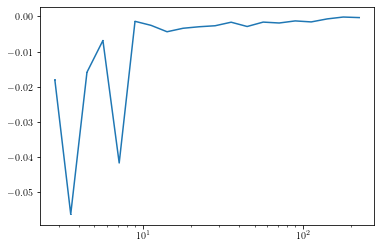

In [43]:
#difference:

fig, ax = plt.subplots()

ax.errorbar( meanr, (galaxy_xi-galaxy_xi_lin), xi_err )
ax.set_xscale('log')

print(xi_err)

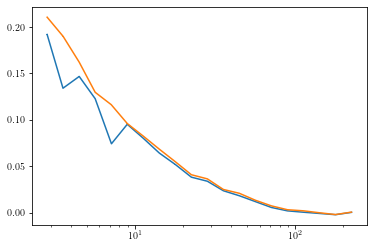

In [17]:
# plotted together:

fig, ax = plt.subplots()

ax.errorbar( meanr, galaxy_xi, xi_err )
ax.errorbar( meanr_lin, galaxy_xi_lin, xi_err_lin )
ax.set_xscale('log')

In [ ]:
# compare against CMASS:

import fitsio
cmass = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/galaxy_DR12v5_CMASS_South.fits.gz')
rand_cmass = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/random1_DR12v5_CMASS_South.fits.gz')
# read in all of CMASS**** SGC //
print(cmass.size)

cmass = keepGoodRegion(cmass)
rand_cmass = keepGoodRegion(rand_cmass)

In [ ]:
print(cmass.size)

In [ ]:
#validation region
# convert
#mask4 =(cmass['RA']>18)&(cmass['RA']<43)
#mask4 = mask4 & (cmass['DEC']>-10) & (cmass['DEC']<10)
#cmass = cmass[mask4]

from numpy.lib.recfunctions import append_fields
weights = np.zeros(len(cmass))
for x in range(len(cmass)-1):
    weights[x]=1
cmass = append_fields(cmass, 'WEIGHT', weights, usemask=False)

#random_cmass = uniform_random_on_sphere(cmass, size = 50 * cmass.size)
# applying LSS mask 
#random_cmass = keepGoodRegion(random_cmass)

#fig, ax = plt.subplots()
#ax.plot( cmass['RA'], cmass['DEC'], "b.")
#ax.plot(random_cmass['RA'], random_cmass['DEC'], "g.")

In [ ]:
#randomsind_cmass = np.random.choice( random_cmass.size, size=int(random_cmass.size/3.) )
#random_cmass = random_cmass[randomsind_cmass]

In [ ]:
npatch=80
tempdir = rootdir+'/{}/'.format(npatch)
cen_file = tempdir + 'nn_cen_file_cmass.txt'
filename = tempdir + 'nn.lens_cmass.txt'

#os.system('mkdir '+savedir)
#print (os.path.exists(tempdir) )
os.system('rm -rf '+tempdir)
os.system('mkdir '+tempdir)

# default of poisson errors -- try this
# ***save to different variables to compare different methods of errors

treecorr_xi(cmass, random=rand_cmass,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.05,
        npatch=npatch, cen_file=cen_file, var_method='shot')

cov_new= np.genfromtxt(tempdir+'/nn.lens_cmass.cov'.format(npatch))
_, meanr_cmass, _, galaxy_xi_cmass, xi_err_cmass,_,_,_,_,_ = np.genfromtxt(tempdir+'nn.lens_cmass.txt'.format(npatch), unpack=True)

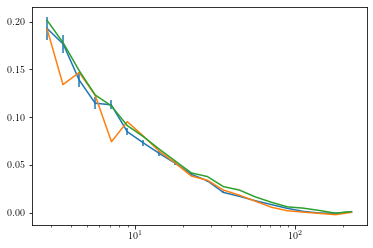

In [22]:
# plot up against CMASS

fig, ax = plt.subplots()

#ax.loglog(theta, galaxy_xi_theory)
#ax.errorbar( theta, galaxy_xi_theory, np.sqrt(cov.diagonal()))
ax.errorbar( meanr_cmass, galaxy_xi_cmass, xi_err_cmass )
ax.errorbar( meanr, galaxy_xi, xi_err)
ax.errorbar( meanr_unw, galaxy_xi_unw, xi_err_unw)
ax.set_xscale('log')

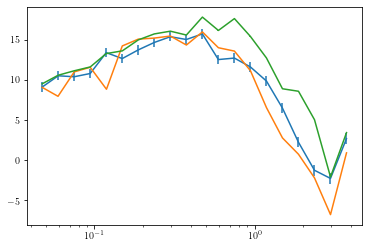

In [23]:
# fix units to be like Y1 paper:

fig, ax = plt.subplots()

#ax.loglog(theta, galaxy_xi_theory)
#ax.errorbar( theta, galaxy_xi_theory, np.sqrt(cov.diagonal()))
ax.errorbar( meanr_cmass/60, 1000*galaxy_xi_cmass*(meanr_cmass/60), 1000*xi_err_cmass*(meanr_cmass/60) )
ax.errorbar( meanr/60, 1000*galaxy_xi*(meanr/60),1000*xi_err*(meanr/60))
ax.errorbar( meanr_unw/60, 1000*galaxy_xi_unw*(meanr_unw/60),1000*xi_err_unw*(meanr_unw/60))
ax.set_xscale('log')

In [ ]:
#work on errors